In [1]:
import pandas as pd

In [2]:
# 1. read in data:
df_large_countries_2015 = pd.read_csv('../data/large_countries_2015.csv', index_col=0)


In [8]:
df = df_large_countries_2015
df

population  fertility      continent
Bangladesh     1.609956e+08       2.12           Asia
Brazil         2.078475e+08       1.78  South America
China          1.376049e+09       1.57           Asia
India          1.311051e+09       2.43           Asia
Indonesia      2.575638e+08       2.28           Asia
Japan          1.265735e+08       1.45           Asia
Mexico         1.270172e+08       2.13  North America
Nigeria        1.822020e+08       5.89         Africa
Pakistan       1.889249e+08       3.04           Asia
Philippines    1.006994e+08       2.98           Asia
Russia         1.434569e+08       1.61         Europe
United States  3.217736e+08       1.97  North America

In [9]:
# 2. check dataframe for null values
df_large_countries_2015.isnull()

population  fertility  continent
Bangladesh          False      False      False
Brazil              False      False      False
China               False      False      False
India               False      False      False
Indonesia           False      False      False
Japan               False      False      False
Mexico              False      False      False
Nigeria             False      False      False
Pakistan            False      False      False
Philippines         False      False      False
Russia              False      False      False
United States       False      False      False

In [4]:
# 3. check datatypes
df_large_countries_2015.dtypes

population    float64
fertility     float64
continent      object
dtype: object

In [5]:
# 4. check how many countries from each continent are in the dataset

continent_counts = df_large_countries_2015['continent'].value_counts()
continent_counts

continent
Asia             7
North America    2
South America    1
Africa           1
Europe           1
Name: count, dtype: int64

In [6]:
# 5. display a dataframe which only has countries located in Asia
asia_mask = df_large_countries_2015['continent'] == 'Asia'
df_large_countries_2015.loc[asia_mask]

population  fertility continent
Bangladesh   1.609956e+08       2.12      Asia
China        1.376049e+09       1.57      Asia
India        1.311051e+09       2.43      Asia
Indonesia    2.575638e+08       2.28      Asia
Japan        1.265735e+08       1.45      Asia
Pakistan     1.889249e+08       3.04      Asia
Philippines  1.006994e+08       2.98      Asia

In [10]:
# 6. display a dataframe which only has countries that have a population over 250,000,000
population_filter = df_large_countries_2015['population'] > 250000000
df.loc[population_filter]

population  fertility      continent
China          1.376049e+09       1.57           Asia
India          1.311051e+09       2.43           Asia
Indonesia      2.575638e+08       2.28           Asia
United States  3.217736e+08       1.97  North America

In [11]:
# 7. display a dataframe which only has countries that have a population of no less than 100,000 and no more than 250,000,000
population_filter_2 = (df_large_countries_2015['population'] <= 250000000) & (df_large_countries_2015['population'] >= 100000)
df.loc[population_filter_2]

population  fertility      continent
Bangladesh   160995642.0       2.12           Asia
Brazil       207847528.0       1.78  South America
Japan        126573481.0       1.45           Asia
Mexico       127017224.0       2.13  North America
Nigeria      182201962.0       5.89         Africa
Pakistan     188924874.0       3.04           Asia
Philippines  100699395.0       2.98           Asia
Russia       143456918.0       1.61         Europe

In [12]:
# 8. display a dataframe which only has countries located in Asia that have a fertilitiy rate of less than 1.8
asia_rate_mask = (asia_mask)&(df_large_countries_2015['fertility'] <1.8)
df.loc[asia_rate_mask]

population  fertility continent
China  1.376049e+09       1.57      Asia
Japan  1.265735e+08       1.45      Asia

In [13]:
from matplotlib import pyplot as plt

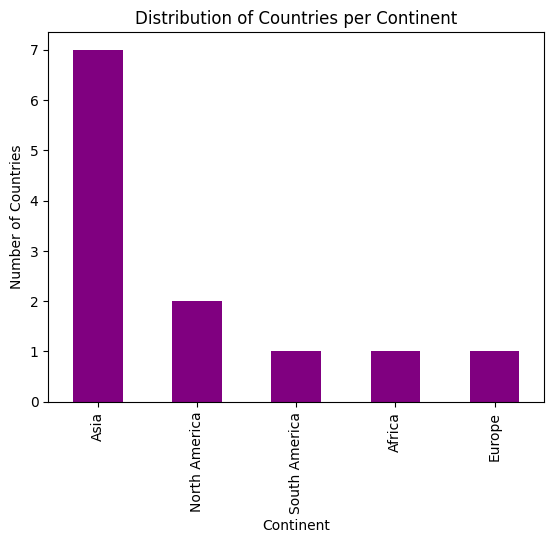

In [14]:
##Distribution of Countries per Continent
continent_counts.plot(kind='bar', color='purple')

plt.title('Distribution of Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

plt.show()

In [46]:
dfpop = pd.read_csv('../data/population.csv')

In [47]:
#Rename columns
dfpop.rename(columns =  {'Total population' : 'country',
                    'population':'total population'},inplace = True)
dfpop

country  year  total population
0                                          Abkhazia  1800               NaN
1                                       Afghanistan  1800         3280000.0
2                             Akrotiri and Dhekelia  1800               NaN
3                                           Albania  1800          410445.0
4                                           Algeria  1800         2503218.0
...                                             ...   ...               ...
22270                             Northern Marianas  2015               NaN
22271  South Georgia and the South Sandwich Islands  2015               NaN
22272                     US Minor Outlying Islands  2015               NaN
22273                                Virgin Islands  2015               NaN
22274                                     West Bank  2015               NaN

[22275 rows x 3 columns]

In [48]:
#check missing data
dfpop.isnull().sum()

country                0
year                   0
total population    2099
dtype: int64

In [49]:
#remove missing data
dfpop.dropna(inplace=True)
dfpop

country  year  total population
1                    Afghanistan  1800         3280000.0
3                        Albania  1800          410445.0
4                        Algeria  1800         2503218.0
5                 American Samoa  1800            8170.0
6                        Andorra  1800            2654.0
...                          ...   ...               ...
22256                     Zambia  2015        16211767.0
22257                   Zimbabwe  2015        15602751.0
22259                South Sudan  2015        12339812.0
22260                    Curaçao  2015          157203.0
22261  Sint Maarten (Dutch part)  2015           38745.0

[20176 rows x 3 columns]

In [50]:
#filter for relevant data
filtered_df = dfpop[dfpop['year'] >= 1950]

In [44]:
filtered_df.reset_index(drop = True, inplace = True)
filtered_df

country  year  total population
0                    Afghanistan  1950         7752118.0
1          Akrotiri and Dhekelia  1950           10661.0
2                        Albania  1950         1263171.0
3                        Algeria  1950         8872247.0
4                 American Samoa  1950           18937.0
...                          ...   ...               ...
16736                     Zambia  2015        16211767.0
16737                   Zimbabwe  2015        15602751.0
16738                South Sudan  2015        12339812.0
16739                    Curaçao  2015          157203.0
16740  Sint Maarten (Dutch part)  2015           38745.0

[16741 rows x 3 columns]

In [26]:
#make data persistent
filtered_df.to_csv('../data/filtered_population.csv')

In [27]:
#fertility_rate
dffr = pd.read_csv('../data/fertility_rate.csv')
dffr

Total fertility rate  year  fertility
0                   Abkhazia  1800        NaN
1                Afghanistan  1800       7.00
2      Akrotiri and Dhekelia  1800        NaN
3                    Albania  1800       4.60
4                    Algeria  1800       6.99
...                      ...   ...        ...
56154                  Yemen  2015       3.83
56155             Yugoslavia  2015        NaN
56156                 Zambia  2015       5.59
56157               Zimbabwe  2015       3.35
56158                  Åland  2015        NaN

[56159 rows x 3 columns]

In [28]:
#Rename columns
dffr.rename(columns =  {'Total fertility rate' : 'country',
                    'fertility':'fertility_rate'},inplace = True)

In [29]:
#check missing data
dffr.isnull().sum()

country               0
year                  0
fertility_rate    12747
dtype: int64

In [30]:
#remove missing data
dffr.dropna(inplace=True)

In [31]:
#Filter for relevant data
filtered_dffr = dffr[dffr['year'] >= 1950]

In [32]:
filtered_dffr.reset_index(drop = True, inplace = True)

In [33]:
#make data persistent
filtered_dffr.to_csv('../data/filtered_fertility_rate.csv')

In [34]:
#life_expectancy
dfle = pd.read_excel('../data/life_expectancy.xls')

In [36]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [37]:
#Rename columns
dfle.rename(columns =  {'Life expectancy' : 'country'},inplace = True)
dfle

country  year  life expectancy
0                   Abkhazia  1800              NaN
1                Afghanistan  1800            28.21
2      Akrotiri and Dhekelia  1800              NaN
3                    Albania  1800            35.40
4                    Algeria  1800            28.82
...                      ...   ...              ...
56415             Yugoslavia  2016              NaN
56416                 Zambia  2016            57.10
56417               Zimbabwe  2016            61.69
56418                  Åland  2016              NaN
56419            South Sudan  2016            56.10

[56420 rows x 3 columns]

In [38]:
#check missing data
dfle.isnull().sum()

country                0
year                   0
life expectancy    12563
dtype: int64

In [39]:
#remove missing data
dfle.dropna()

country  year  life expectancy
1                Afghanistan  1800            28.21
3                    Albania  1800            35.40
4                    Algeria  1800            28.82
7                     Angola  1800            26.98
9        Antigua and Barbuda  1800            33.54
...                      ...   ...              ...
56411  Virgin Islands (U.S.)  2016            80.82
56414                  Yemen  2016            64.92
56416                 Zambia  2016            57.10
56417               Zimbabwe  2016            61.69
56419            South Sudan  2016            56.10

[43857 rows x 3 columns]

In [40]:
#Filter for relevant data
filtered_dfle = dfle[dfle['year'] >= 1950]
filtered_dfle

country  year  life expectancy
39000               Abkhazia  1950              NaN
39001            Afghanistan  1950            26.85
39002  Akrotiri and Dhekelia  1950              NaN
39003                Albania  1950            54.48
39004                Algeria  1950            42.77
...                      ...   ...              ...
56415             Yugoslavia  2016              NaN
56416                 Zambia  2016            57.10
56417               Zimbabwe  2016            61.69
56418                  Åland  2016              NaN
56419            South Sudan  2016            56.10

[17420 rows x 3 columns]

In [41]:
filtered_dfle.reset_index(drop = True, inplace = True)
filtered_dfle

country  year  life expectancy
0                   Abkhazia  1950              NaN
1                Afghanistan  1950            26.85
2      Akrotiri and Dhekelia  1950              NaN
3                    Albania  1950            54.48
4                    Algeria  1950            42.77
...                      ...   ...              ...
17415             Yugoslavia  2016              NaN
17416                 Zambia  2016            57.10
17417               Zimbabwe  2016            61.69
17418                  Åland  2016              NaN
17419            South Sudan  2016            56.10

[17420 rows x 3 columns]

In [42]:
#make data persistent
filtered_dfle.to_csv('../data/filtered_life_expectancy.csv',index = False)

In [ ]:
##Descriptive Statistics

In [51]:
life_df = pd.read_csv('../data/filtered_life_expectancy.csv', index_col=0)

In [52]:
# 2. calculate the mean life expectancy
life_df['life expectancy'].mean()

62.98883344276646

In [54]:
# 3. calculate the mean life expectancy for the year 2000
life_df_2000 = life_df[life_df['year'] == 2000]
life_df_2000['life expectancy'].mean()

68.0777033492823

In [55]:
# 4. calculate the median for 1995
life_df_1995 = life_df[life_df['year'] == 1995]
life_df_1995['life expectancy'].median()

70.0

In [56]:
# 5. calculate the standard deviation
life_df['life expectancy'].std()

11.895571799771128

In [57]:
# 6. find the highest life expectancy
max_life = life_df['life expectancy'].max()
max_life

84.8

In [58]:
# 7. find the country and year for the highest life expectancy
mask_max = life_df['life expectancy']== max_life
life_df_max = life_df[mask_max]
life_df_max
life_df_max['year']

country
Andorra    2013
Andorra    2014
Andorra    2015
Andorra    2016
Name: year, dtype: int64

In [59]:
# 8. find the lowest life expectancy
min_life = life_df['life expectancy'].min()
min_life

13.2

In [60]:
# 9. find the country and year was the lowest life expectancy
mask_min = life_df['life expectancy']== min_life
life_df_min = life_df[mask_max]
life_df_min
life_df_min['year']

country
Andorra    2013
Andorra    2014
Andorra    2015
Andorra    2016
Name: year, dtype: int64

In [61]:
# 10. find the 90% quantile of the life expectancy
life_df['life expectancy'].quantile(0.9)

76.4

In [62]:
# 11. calculate min, max, mean and possibly other descriptors with a single line
life_df.describe()

year  life expectancy
count  17420.000000     13707.000000
mean    1983.000000        62.988833
std       19.339635        11.895572
min     1950.000000        13.200000
25%     1966.000000        54.815000
50%     1983.000000        65.570000
75%     2000.000000        72.230000
max     2016.000000        84.800000

In [69]:
##Merging Dataframes

In [74]:
df_fertility = pd.read_csv('../data/filtered_fertility_rate.csv')

In [75]:
df_population = pd.read_csv('../data/filtered_population.csv')

In [71]:
df_life = pd.read_csv('../data/filtered_life_expectancy.csv')
df_life

country  year  life expectancy
0                   Abkhazia  1950              NaN
1                Afghanistan  1950            26.85
2      Akrotiri and Dhekelia  1950              NaN
3                    Albania  1950            54.48
4                    Algeria  1950            42.77
...                      ...   ...              ...
17415             Yugoslavia  2016              NaN
17416                 Zambia  2016            57.10
17417               Zimbabwe  2016            61.69
17418                  Åland  2016              NaN
17419            South Sudan  2016            56.10

[17420 rows x 3 columns]

In [72]:
df_continents = pd.read_csv('../data/continents.csv',sep = ';')
df_continents

continent    country
0           Africa    Algeria
1           Africa     Angola
2           Africa      Benin
3           Africa   Botswana
4           Africa    Burkina
..             ...        ...
189  South America   Paraguay
190  South America       Peru
191  South America   Suriname
192  South America    Uruguay
193  South America  Venezuela

[194 rows x 2 columns]

In [73]:
#Merge the two dataframes into one using pandas.DataFrame.merge()
df_merge_CL = pd.merge(right =df_continents , left= df_life)
df_merge_CL

country  year  life expectancy continent
0      Afghanistan  1950            26.85      Asia
1      Afghanistan  1951            27.13      Asia
2      Afghanistan  1952            27.67      Asia
3      Afghanistan  1953            28.19      Asia
4      Afghanistan  1954            28.73      Asia
...            ...   ...              ...       ...
11921  South Sudan  2012            56.00    Africa
11922  South Sudan  2013            56.00    Africa
11923  South Sudan  2014            56.10    Africa
11924  South Sudan  2015            56.10    Africa
11925  South Sudan  2016            56.10    Africa

[11926 rows x 4 columns]

In [ ]:
#Repeat steps 1 and 2 with population and total_fertility

In [89]:
df_merge_PF = pd.merge(right =df_population , left= df_fertility, on=['country', 'year'])
df_merge_PF

Unnamed: 0_x                country  year  fertility_rate  \
0                 0            Afghanistan  1950            7.67   
1                 1                Albania  1950            5.80   
2                 2                Algeria  1950            7.65   
3                 3                 Angola  1950            6.93   
4                 4    Antigua and Barbuda  1950            4.45   
...             ...                    ...   ...             ...   
13255         13257                Vietnam  2015            1.70   
13256         13258  Virgin Islands (U.S.)  2015            2.45   
13257         13259                  Yemen  2015            3.83   
13258         13260                 Zambia  2015            5.59   
13259         13261               Zimbabwe  2015            3.35   

       Unnamed: 0_y  total population  
0                 0         7752118.0  
1                 2         1263171.0  
2                 3         8872247.0  
3                 6         4354882.0  
4                 8           46301.0  
...             ...               ...  
13255         16733        93447601.0  
13256         16734          106291.0  
13257         16735        26832215.0  
13258         16736        16211767.0  
13259         16737        15602751.0  

[13260 rows x 6 columns]

In [90]:
new={'Unnamed: 0_x':'unknown',
     'Unnamed: 0_y':'unk'
    }
df_merge_PF.rename(columns= new, inplace=True)
df_merge_PF

unknown                country  year  fertility_rate    unk  \
0            0            Afghanistan  1950            7.67      0   
1            1                Albania  1950            5.80      2   
2            2                Algeria  1950            7.65      3   
3            3                 Angola  1950            6.93      6   
4            4    Antigua and Barbuda  1950            4.45      8   
...        ...                    ...   ...             ...    ...   
13255    13257                Vietnam  2015            1.70  16733   
13256    13258  Virgin Islands (U.S.)  2015            2.45  16734   
13257    13259                  Yemen  2015            3.83  16735   
13258    13260                 Zambia  2015            5.59  16736   
13259    13261               Zimbabwe  2015            3.35  16737   

       total population  
0             7752118.0  
1             1263171.0  
2             8872247.0  
3             4354882.0  
4               46301.0  
...                 ...  
13255        93447601.0  
13256          106291.0  
13257        26832215.0  
13258        16211767.0  
13259        15602751.0  

[13260 rows x 6 columns]

In [92]:
df_merge_PF.drop(columns='unknown', axis=1,inplace=True)

In [91]:
df_merge_PF.drop(columns='unk', axis=1,inplace=True)
df_merge_PF

unknown                country  year  fertility_rate  total population
0            0            Afghanistan  1950            7.67         7752118.0
1            1                Albania  1950            5.80         1263171.0
2            2                Algeria  1950            7.65         8872247.0
3            3                 Angola  1950            6.93         4354882.0
4            4    Antigua and Barbuda  1950            4.45           46301.0
...        ...                    ...   ...             ...               ...
13255    13257                Vietnam  2015            1.70        93447601.0
13256    13258  Virgin Islands (U.S.)  2015            2.45          106291.0
13257    13259                  Yemen  2015            3.83        26832215.0
13258    13260                 Zambia  2015            5.59        16211767.0
13259    13261               Zimbabwe  2015            3.35        15602751.0

[13260 rows x 5 columns]

In [86]:
df_merge_all=pd.merge(right =df_merge_PF , left= df_merge_CL, on= ['country','year'])
df_merge_all

country  year  life expectancy continent  fertility_rate  \
0      Afghanistan  1950            26.85      Asia            7.67   
1      Afghanistan  1951            27.13      Asia            7.67   
2      Afghanistan  1952            27.67      Asia            7.67   
3      Afghanistan  1953            28.19      Asia            7.67   
4      Afghanistan  1954            28.73      Asia            7.67   
...            ...   ...              ...       ...             ...   
11083     Zimbabwe  2011            51.60    Africa            3.64   
11084     Zimbabwe  2012            54.20    Africa            3.56   
11085     Zimbabwe  2013            55.70    Africa            3.49   
11086     Zimbabwe  2014            57.00    Africa            3.41   
11087     Zimbabwe  2015            59.30    Africa            3.35   

       total population  
0             7752118.0  
1             7839426.0  
2             7934798.0  
3             8038312.0  
4             8150037.0  
...                 ...  
11083        14255592.0  
11084        14565482.0  
11085        14898092.0  
11086        15245855.0  
11087        15602751.0  

[11088 rows x 6 columns]

In [93]:
#Write new dataframe to hard drive as gapminder_total.csv
df_merge_all.to_csv('../data/gapminder_total.csv')

In [ ]:
##Aggregation & Groupby

In [95]:
df = df_merge_all

In [98]:
# 2. What is the median population in the data set?
median_population = df['total population'].median()
median_population

5190648.5

In [99]:
#3. How often does each continent appear in the data set?
continent_counts = df['continent'].value_counts()
continent_counts

continent
Africa                   3234
Europe                   2640
Asia                     2574
North America            1254
South America             792
Australia and Oceania     594
Name: count, dtype: int64

In [101]:
# 4. Which continent has the lowest average fertility rate overall?
average_fertility_by_continent = df.groupby('continent')['fertility_rate'].mean()
continent_lowest_fertility = average_fertility_by_continent.idxmin()
continent_lowest_fertility 

'Europe'

In [102]:
# 5. What was the average life expectancy in Europe in 2015? 

df_2015 = df[df['year'] == 2015]
df_2015.groupby('continent')['life expectancy'].agg('mean')

continent
Africa                   63.410204
Asia                     73.933333
Australia and Oceania    69.666667
Europe                   78.755000
North America            75.152632
South America            75.141667
Name: life expectancy, dtype: float64

In [104]:
# 6. How many countries does each continent have in the dataset?
df_2015.groupby('continent')['country'].agg('count')

continent
Africa                   49
Asia                     39
Australia and Oceania     9
Europe                   40
North America            19
South America            12
Name: country, dtype: int64

In [105]:
# 7. What is the average population of a European country in 1976 compare to 2015?
df_2015.groupby('continent')['total population'].agg('mean').astype(int)

continent
Africa                    21417684
Asia                     109528467
Australia and Oceania      4252114
Europe                    15122675
North America             29900365
South America             34847973
Name: total population, dtype: int64

In [106]:
df_1976= df[df['year'] == 1976]
df_1976.groupby('continent')['total population'].agg('mean').astype(int)

continent
Africa                    7850933
Asia                     60323405
Australia and Oceania     2360114
Europe                   13840493
North America            18505321
South America            18496210
Name: total population, dtype: int64

In [109]:
# 8. What is the highest population a continent ever had?
df_max = df.groupby('continent')['total population'].agg(max).astype(int)
df_max

/var/folders/kn/69gx8nmx0z3b3y98m_v_21tr0000gn/T/ipykernel_12208/3114763258.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_max = df.groupby('continent')['total population'].agg(max).astype(int)


continent
Africa                    182201962
Asia                     1376048943
Australia and Oceania      23968973
Europe                     82010184
North America             321773631
South America             207847528
Name: total population, dtype: int64

In [111]:
# 9. Which continent had that population and in which year?
highest_pop_year= df.groupby(['continent','year'])['total population'].max()
highest_pop_year.idxmax()

('Asia', 2015)

Text(0.5, 1.0, 'Comparison of Life Expectancy, Fertility, and Population Averages per Continent')

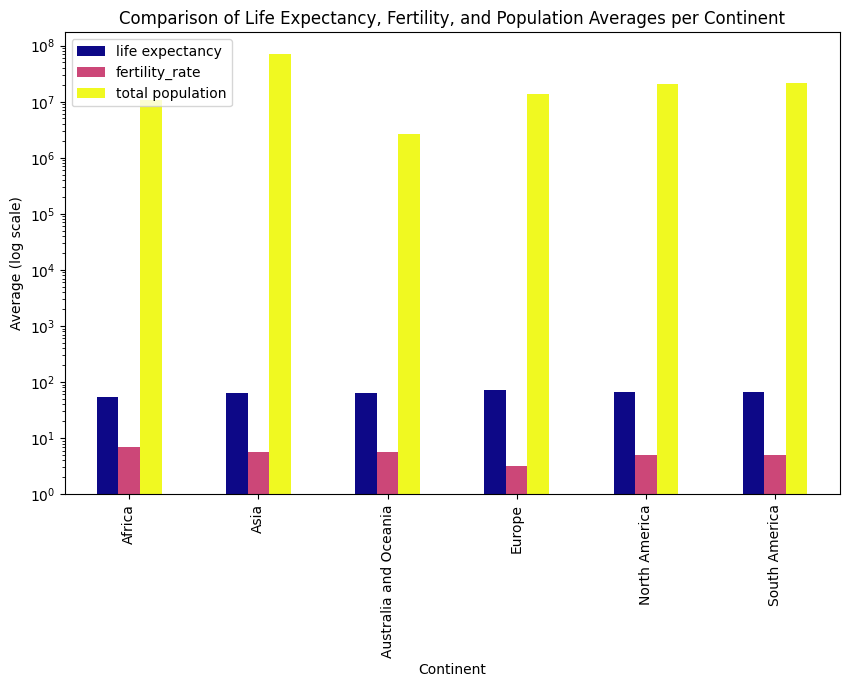

In [112]:
# 10. Plot a bar plot comparison of life_expectancy, fertility, population average per continent
continent_stats = df.groupby('continent').agg({'life expectancy': 'mean', 'fertility_rate': 'mean', 'total population': 'mean'})
ax = continent_stats.plot(kind='bar', log=True, figsize=(10, 6), colormap='plasma')
ax.set_xlabel('Continent')
ax.set_ylabel('Average (log scale)')
ax.set_title('Comparison of Life Expectancy, Fertility, and Population Averages per Continent') 

In [ ]:
##Plotting with Seaborn


In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imageio
import os

In [114]:
df_subset_2015 = df.loc[df['year'] == 2015]
df_subset_1990 = df.loc[df['year'] == 1990]
df_subset_1960 = df.loc[df['year'] == 1960]

[Text(0.5, 1.0, 'Life Expectancy vs Fertility rate')]

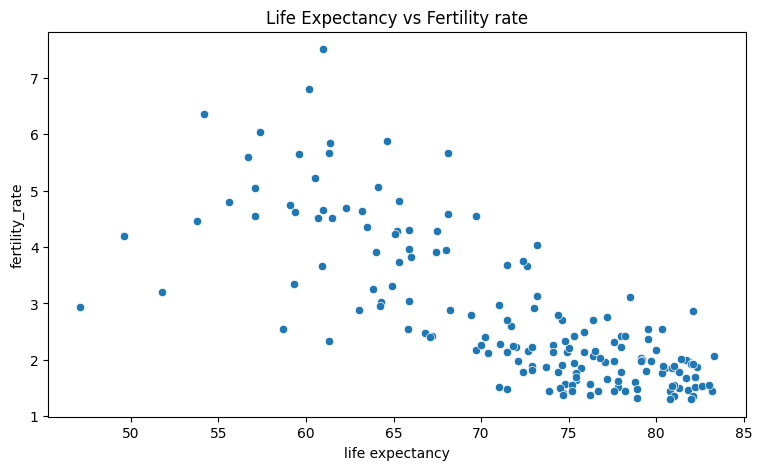

In [115]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='life expectancy',y='fertility_rate' , data=df_subset_2015).set(title=('Life Expectancy vs Fertility rate'))

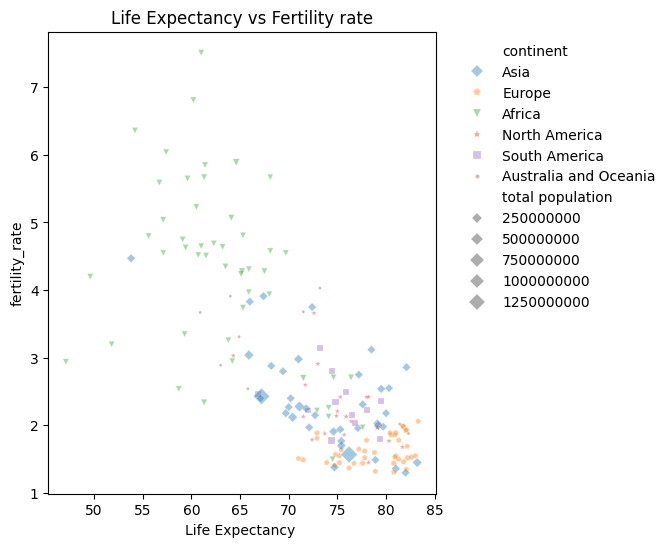

In [116]:
plt.figure(figsize=(5,6))
sns.scatterplot(x='life expectancy',y='fertility_rate' , data=df_subset_2015,size= 'total population', hue='continent',alpha=0.4,style = 'continent',markers = ['D','p','v','*','s','.'])
plt.xlabel('Life Expectancy ')
plt.ylabel('fertility_rate')
plt.legend(bbox_to_anchor=(1.6, 1), frameon=False)
plt.title('Life Expectancy vs Fertility rate');

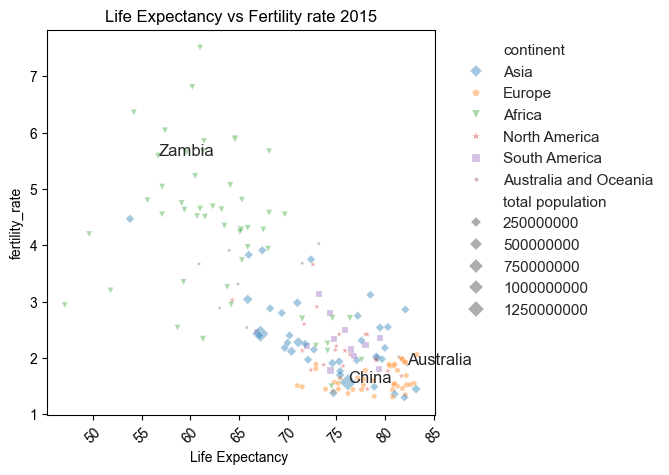

In [117]:
country_to_annotate = 'Zambia'
country_to_annotate_2 = 'Australia'
country_to_annotate_3 = 'China'
country_data_1 = df_subset_2015[df_subset_2015['country'] == country_to_annotate]
country_data_2 = df_subset_2015[df_subset_2015['country'] == country_to_annotate_2]
country_data_3 = df_subset_2015[df_subset_2015['country'] == country_to_annotate_3]
plt.figure(figsize=(5,5))
sns.scatterplot(x='life expectancy',y='fertility_rate' ,size= 'total population', hue='continent',data=df_subset_2015,alpha=0.4,style = 'continent', markers = ['D','p','v','*','s','.'])
sns.set(style="whitegrid")
plt.xlabel('Life Expectancy ')
plt.ylabel('fertility_rate')
plt.title('Life Expectancy vs Fertility rate 2015');
plt.legend(bbox_to_anchor=(1.6,1), frameon = False)
plt.xticks(rotation=45)
plt.annotate(country_to_annotate, 
             xy=(country_data_1['life expectancy'].values[0], country_data_1['fertility_rate'].values[0]),
             )
plt.annotate(country_to_annotate_2, 
             xy=(country_data_2['life expectancy'].values[0], country_data_2['fertility_rate'].values[0]),
             )
plt.annotate(country_to_annotate_3, 
             xy=(country_data_3['life expectancy'].values[0], country_data_3['fertility_rate'].values[0]),
             );

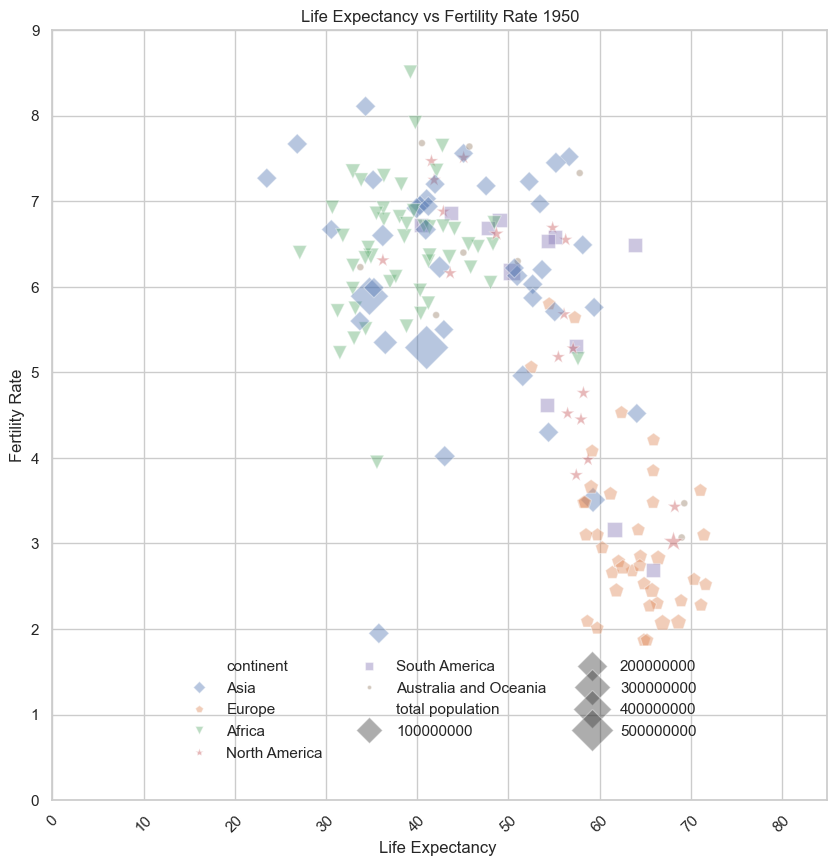

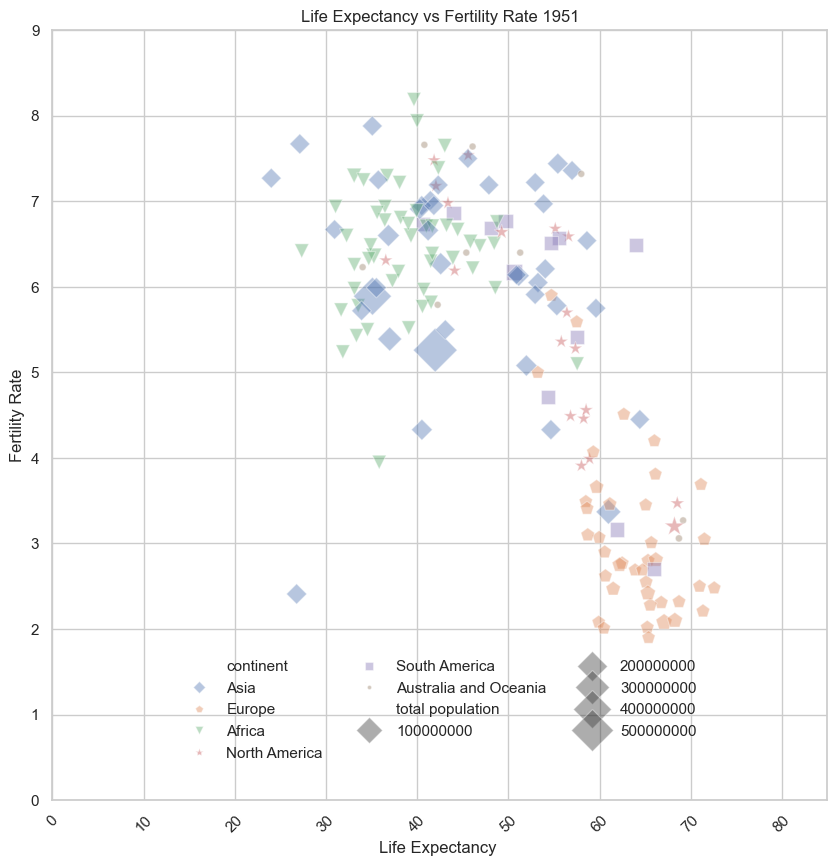

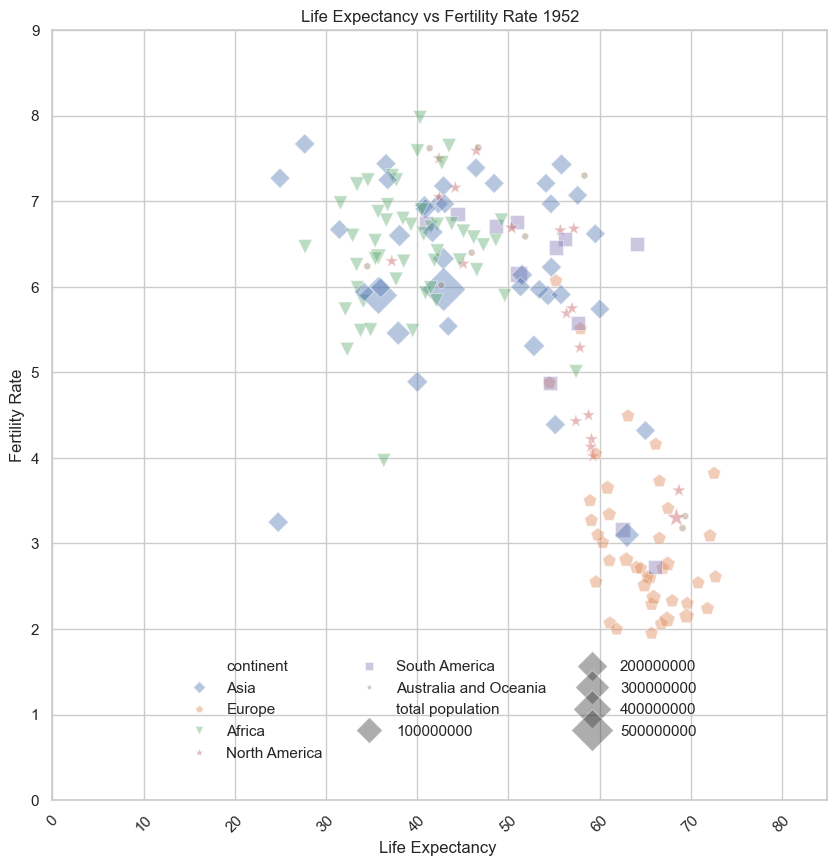

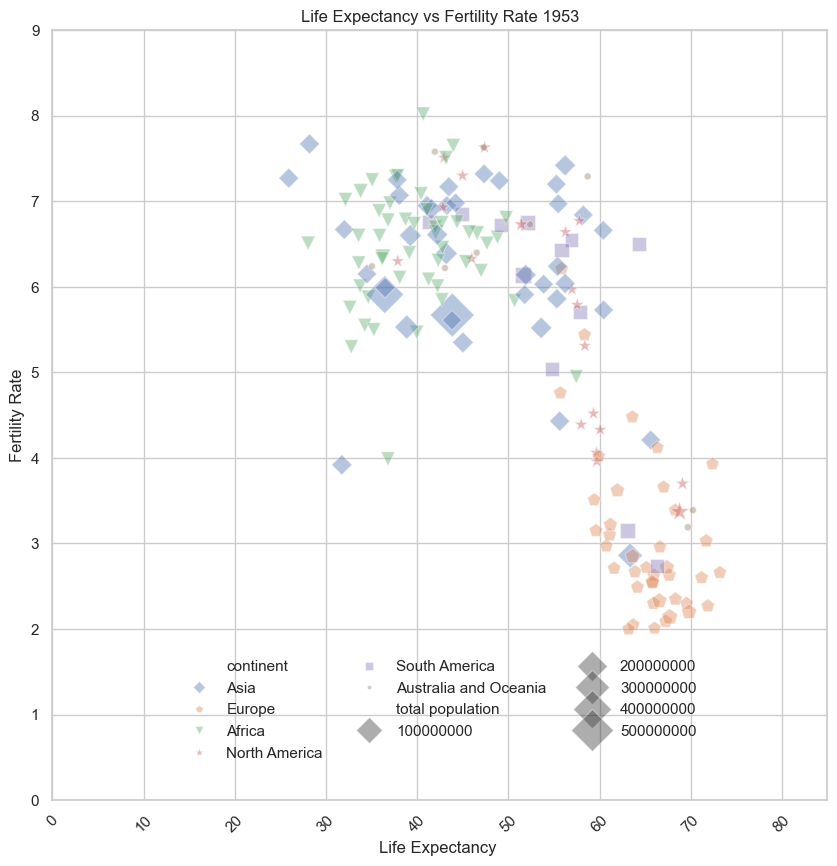

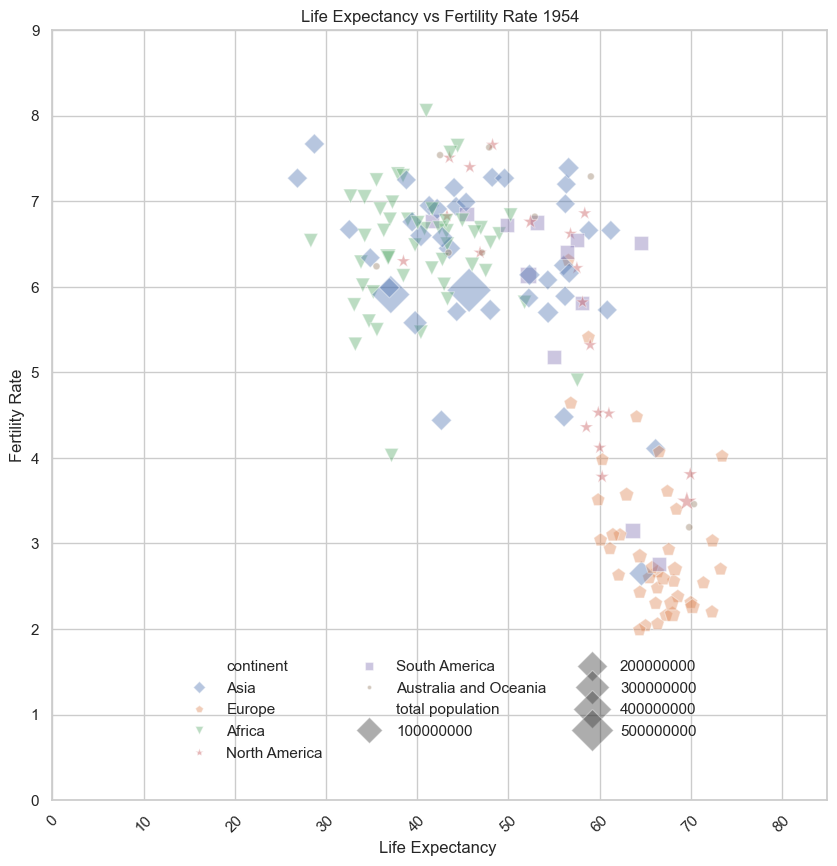

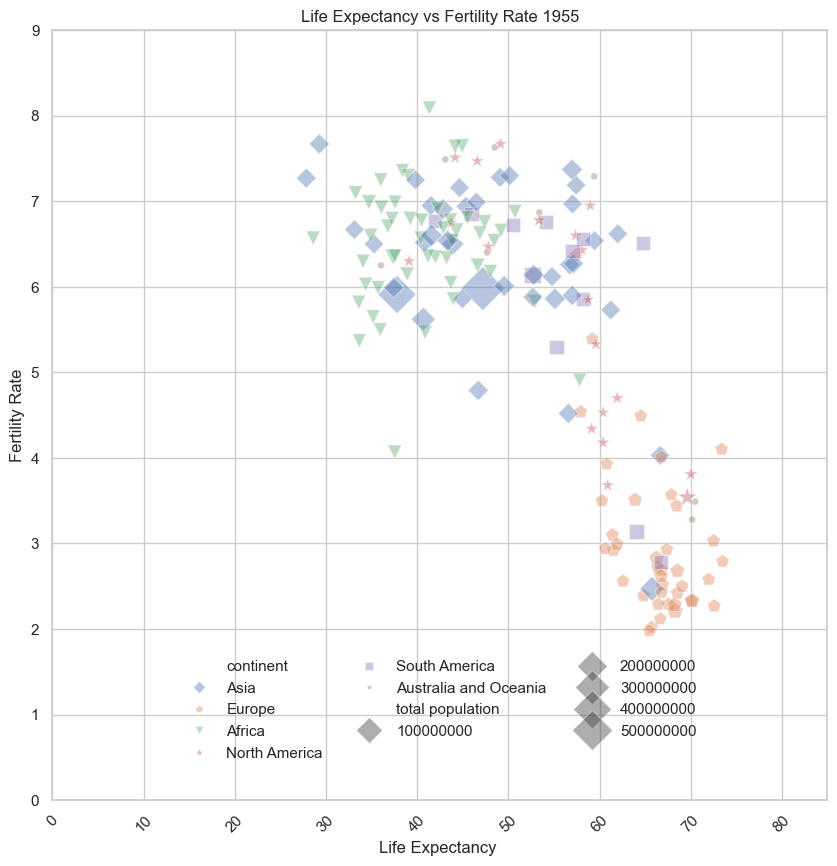

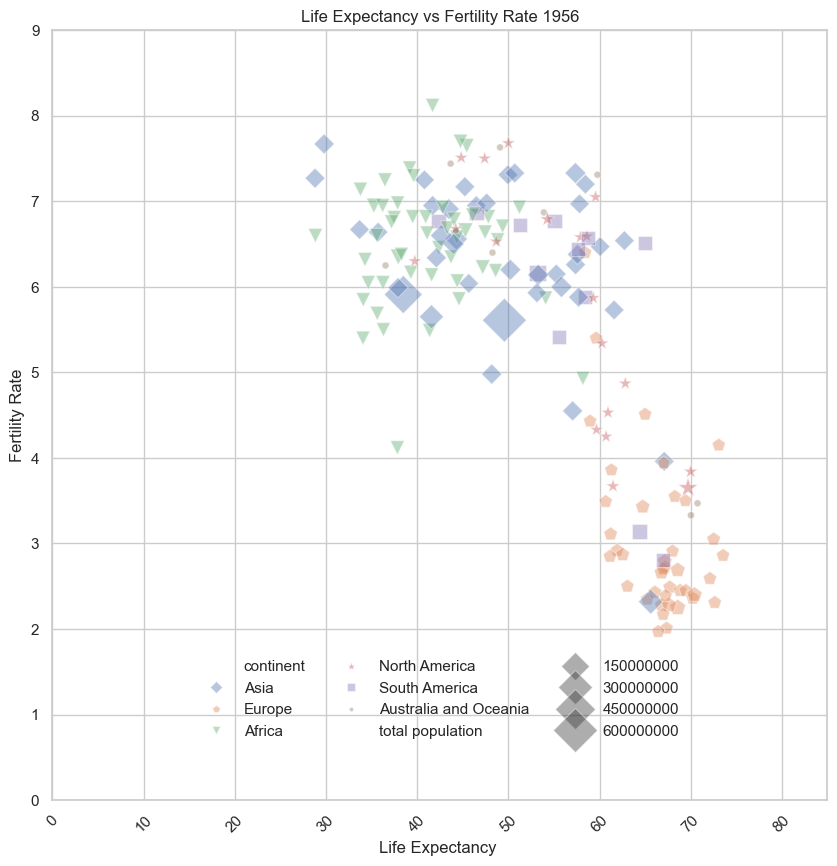

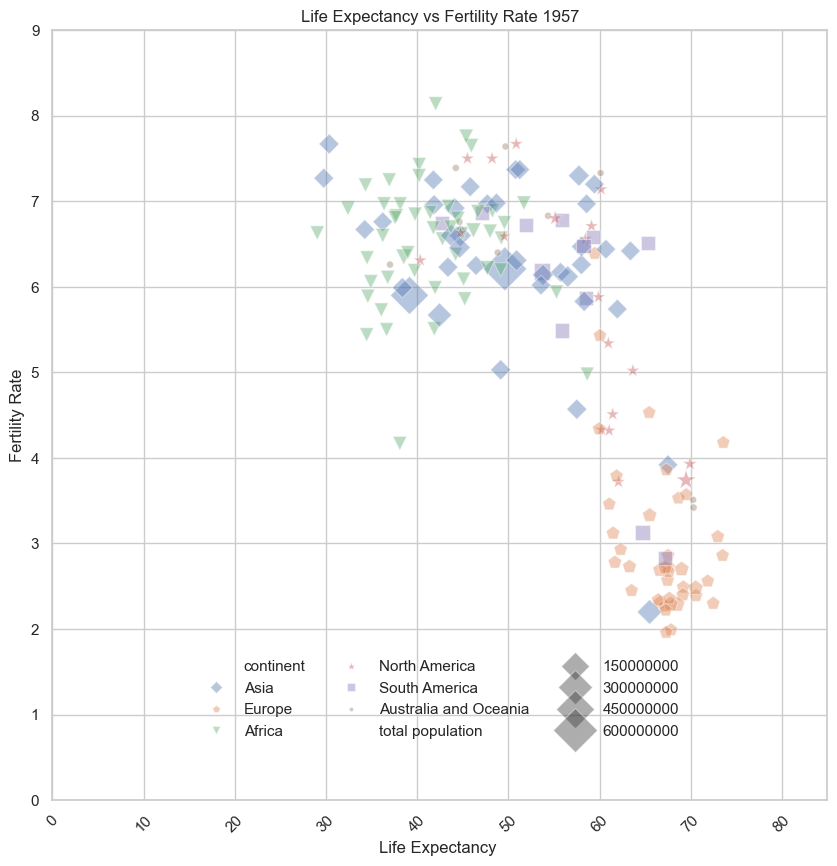

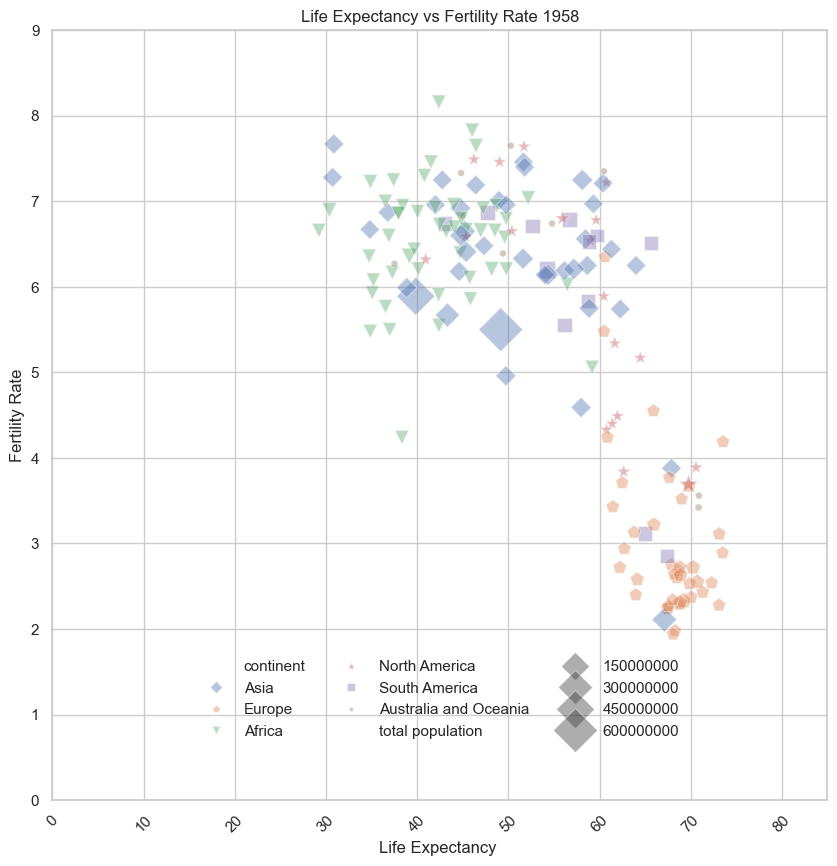

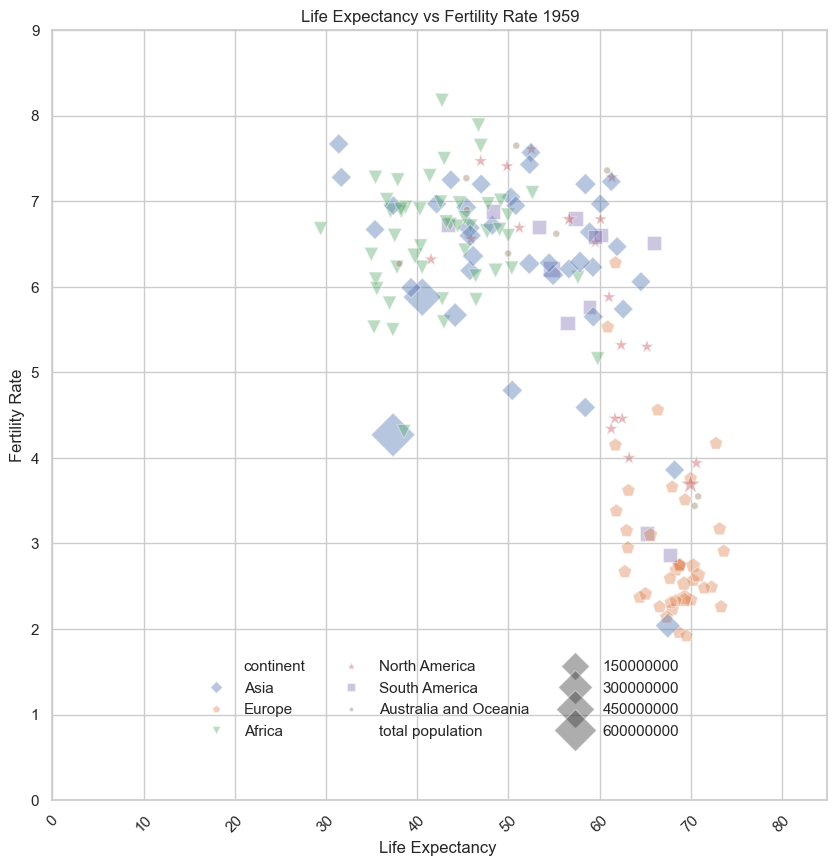

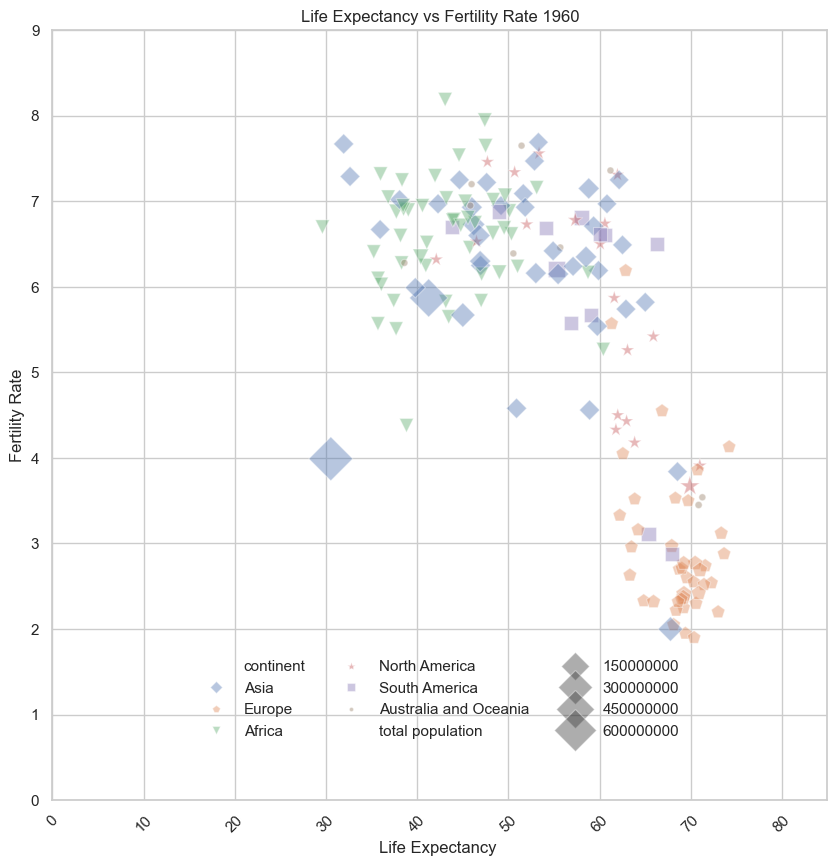

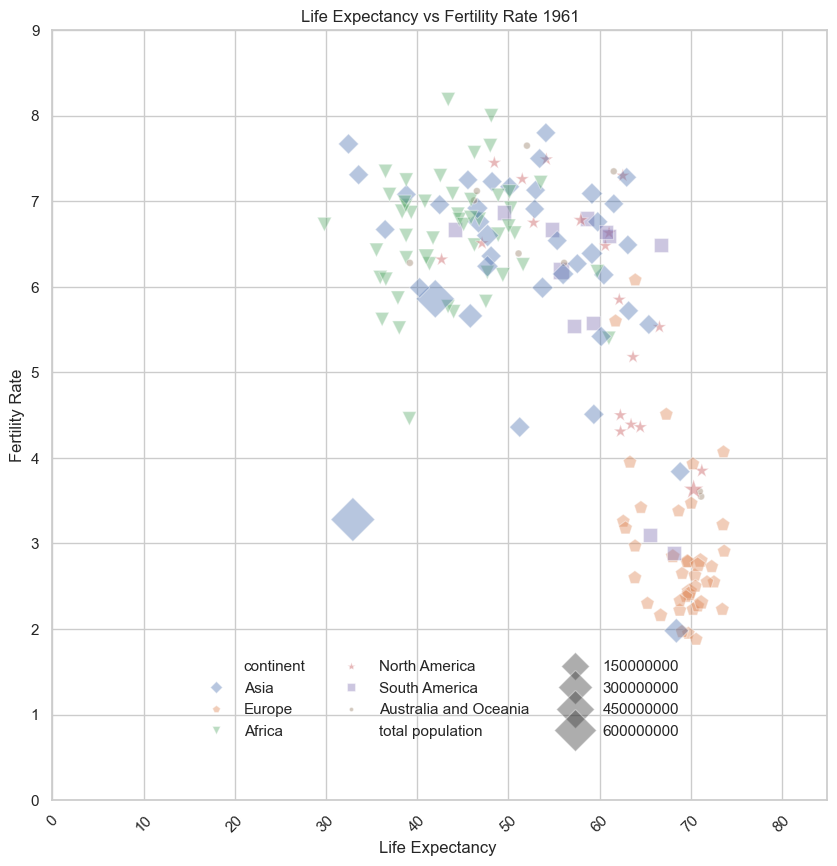

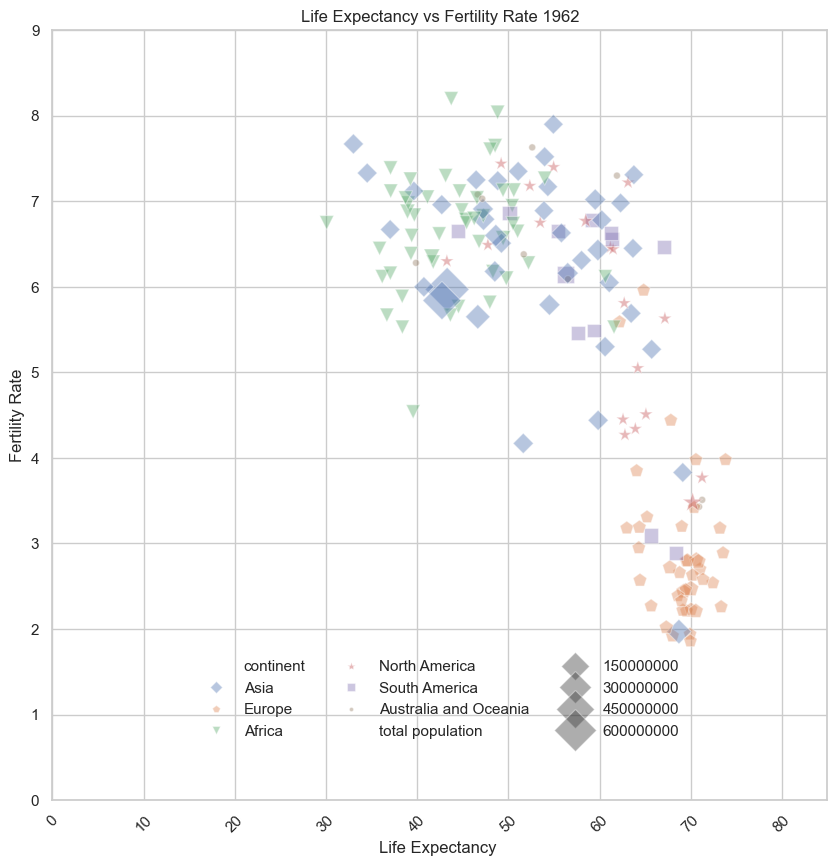

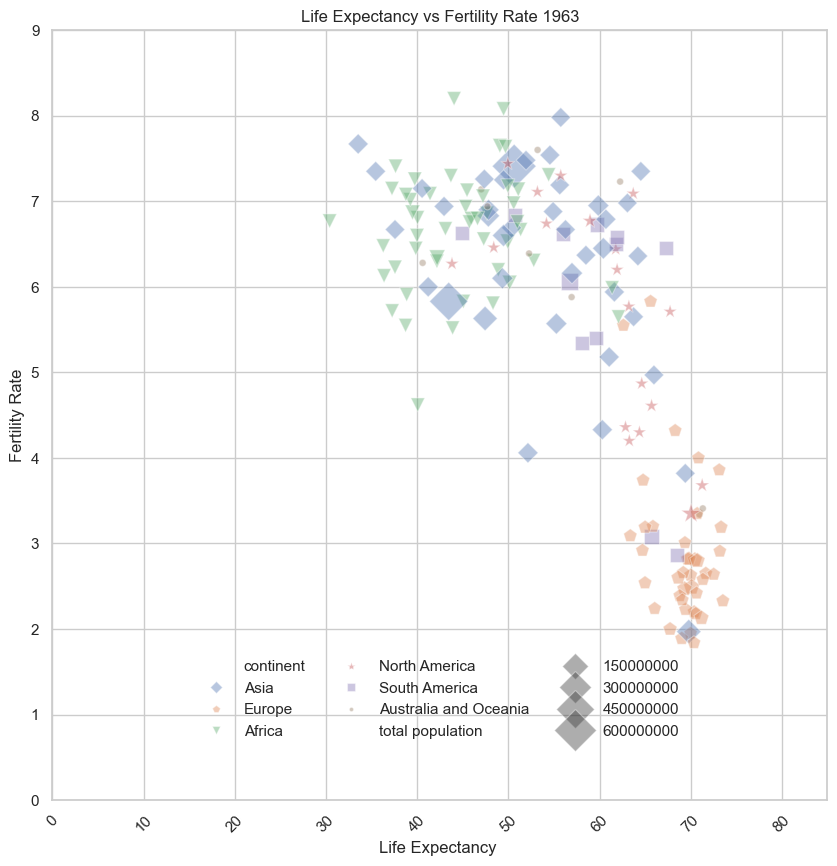

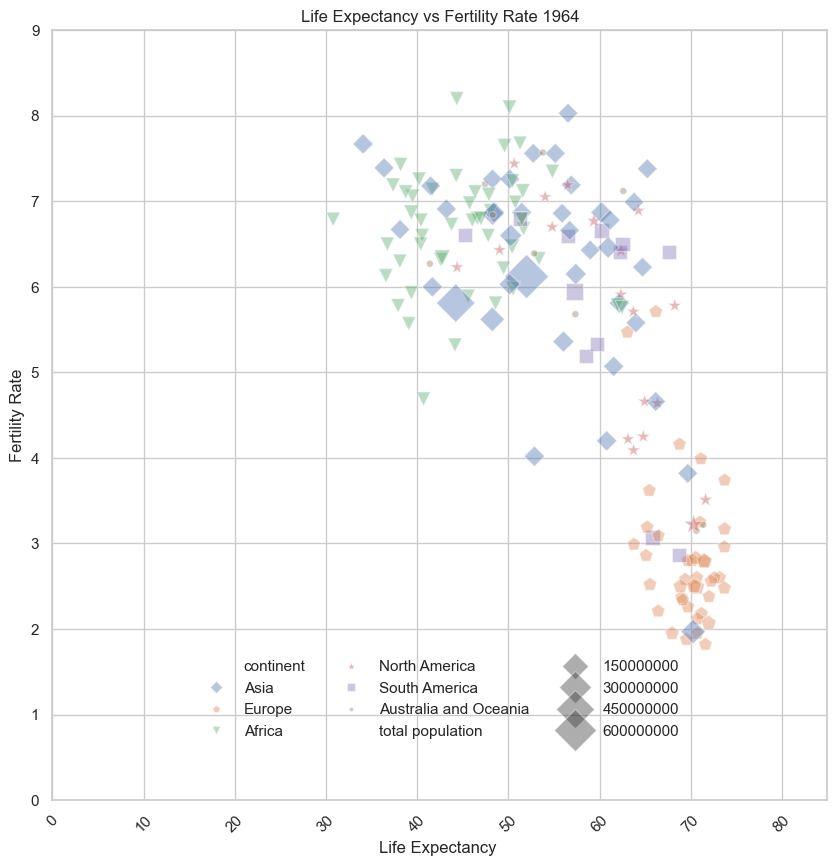

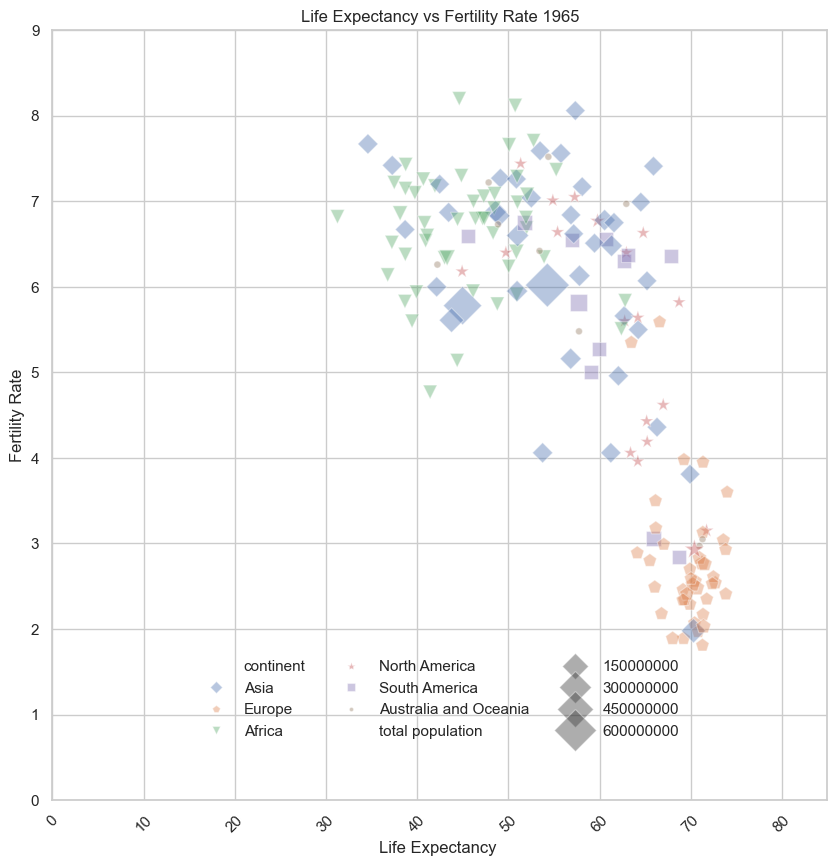

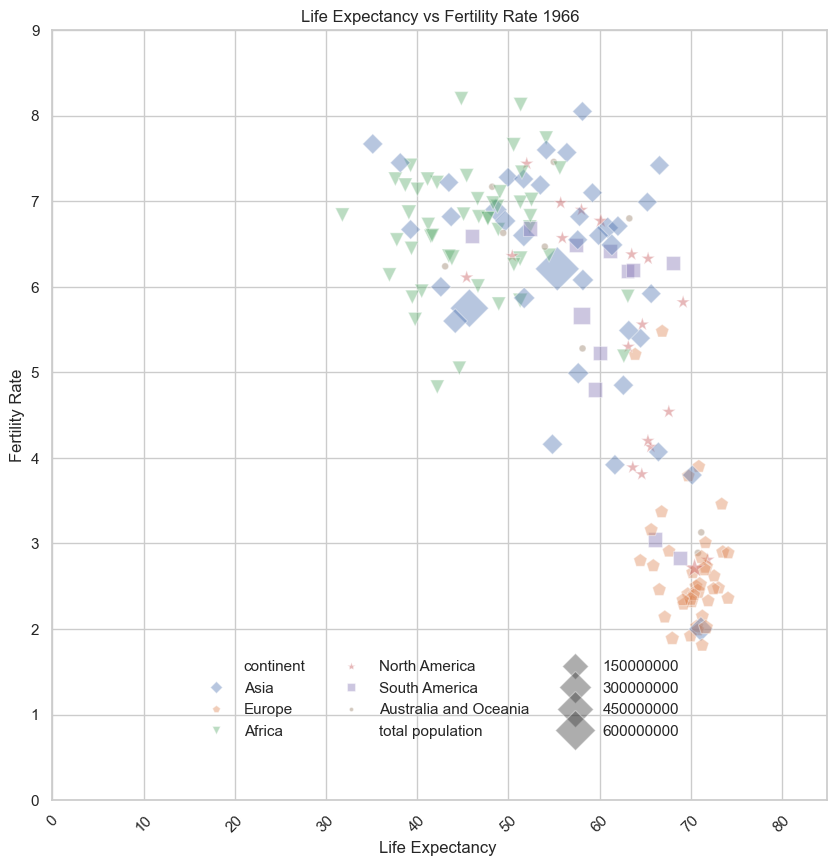

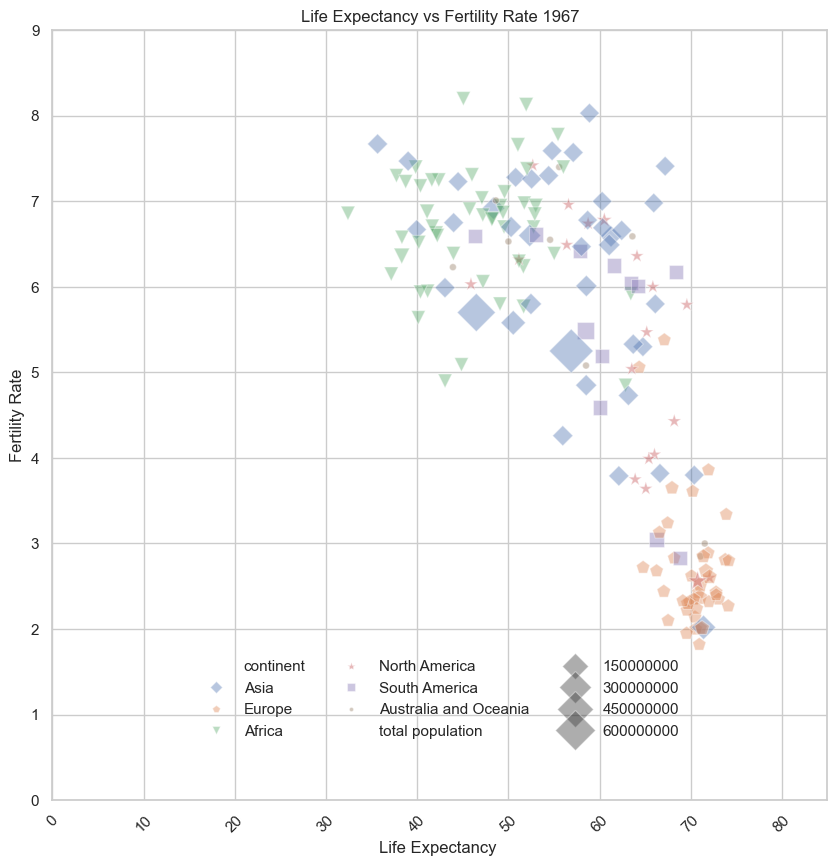

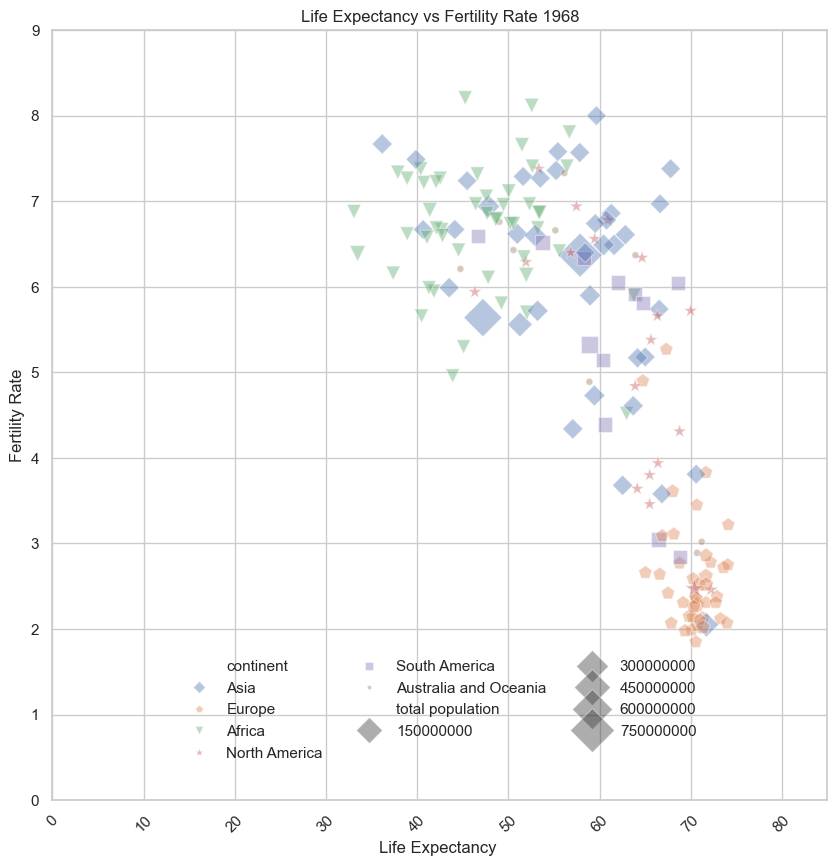

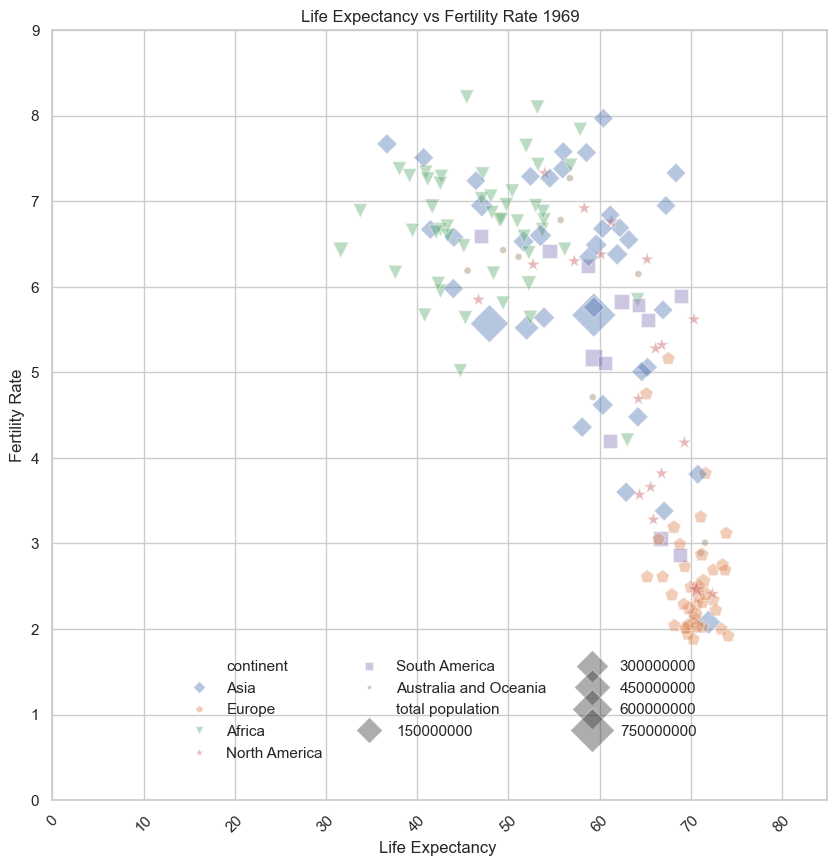

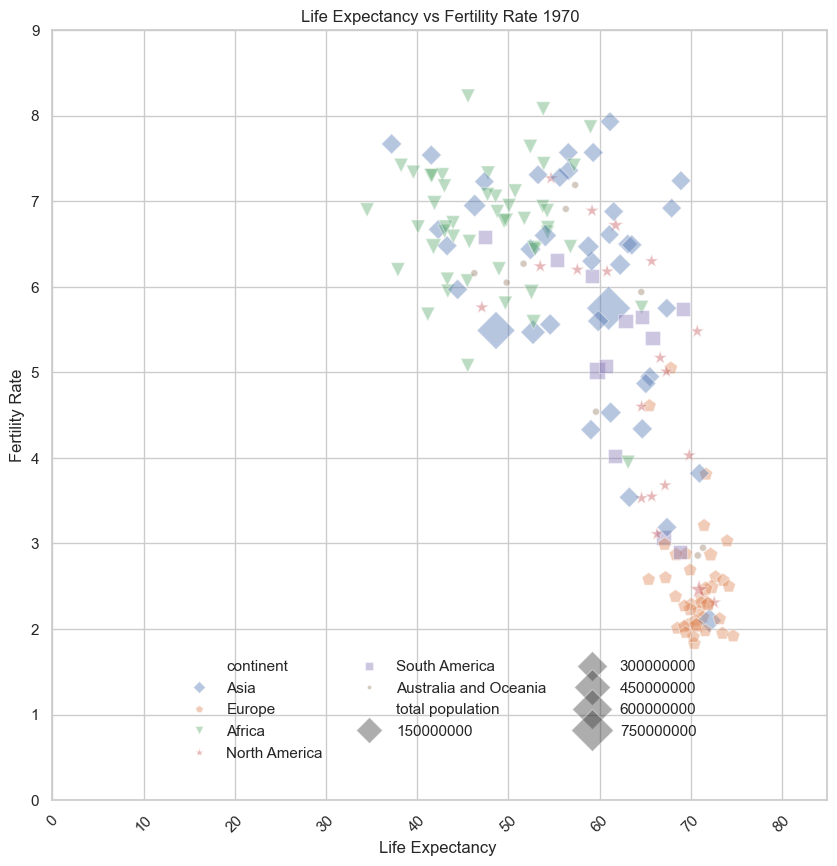

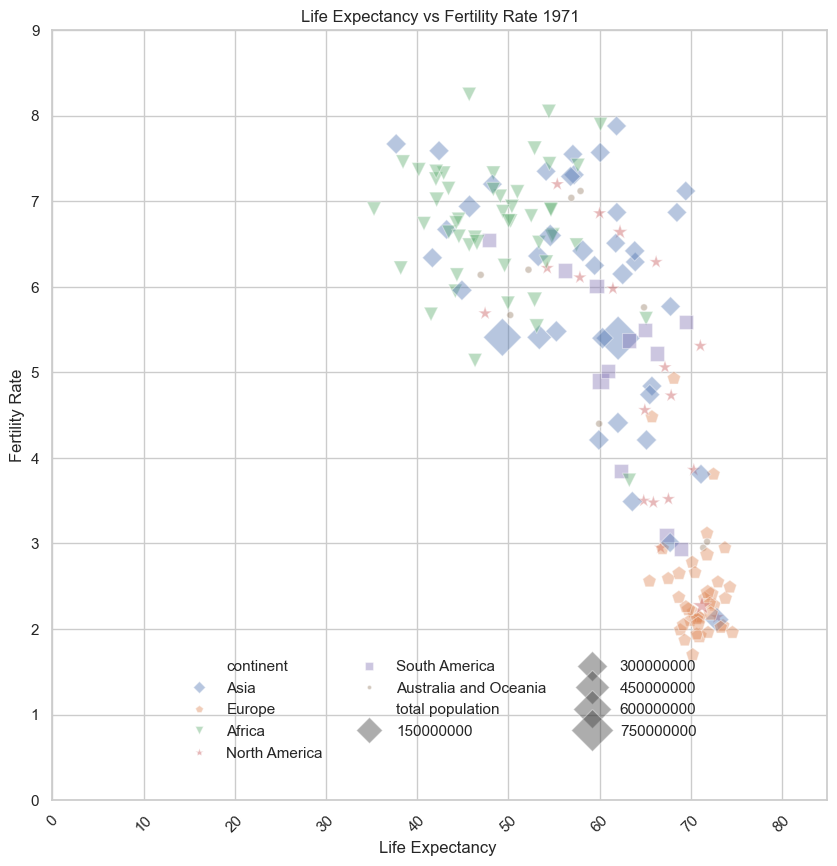

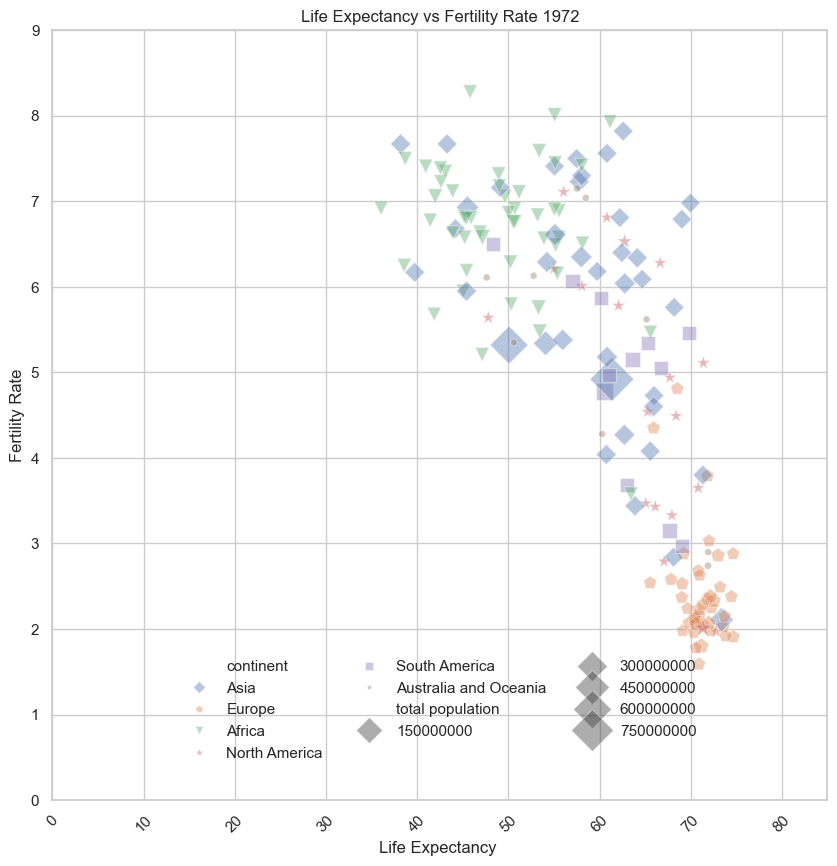

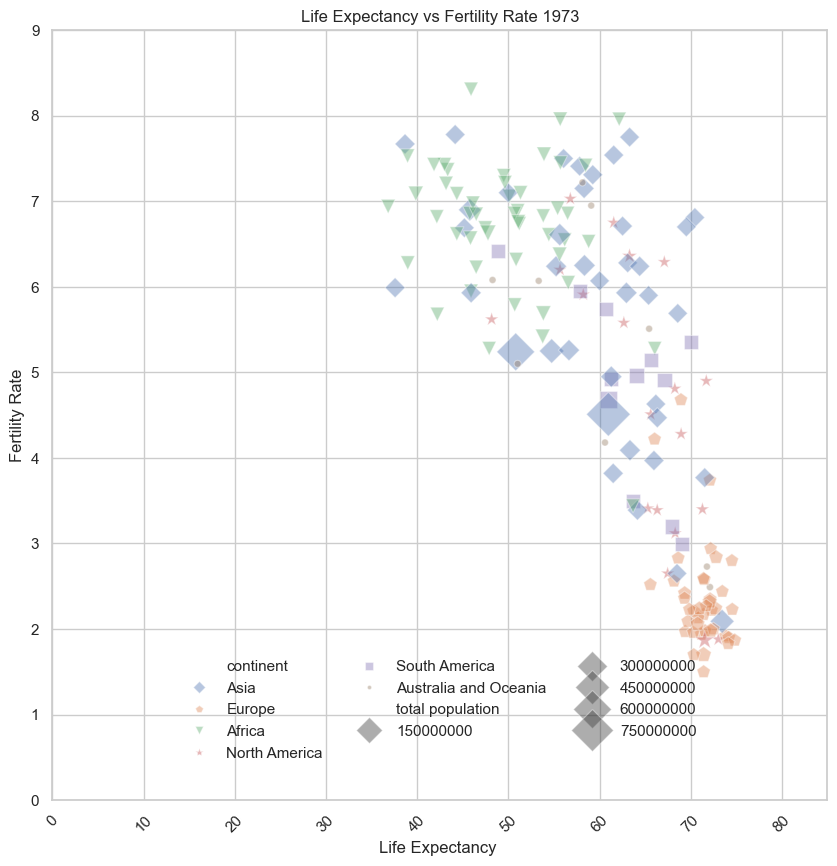

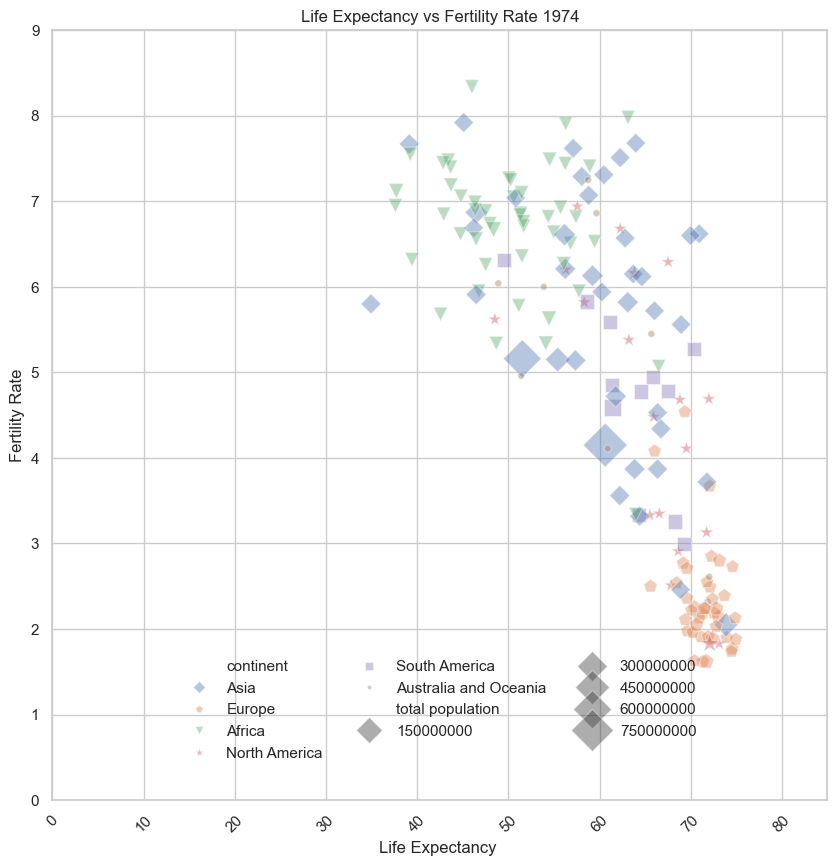

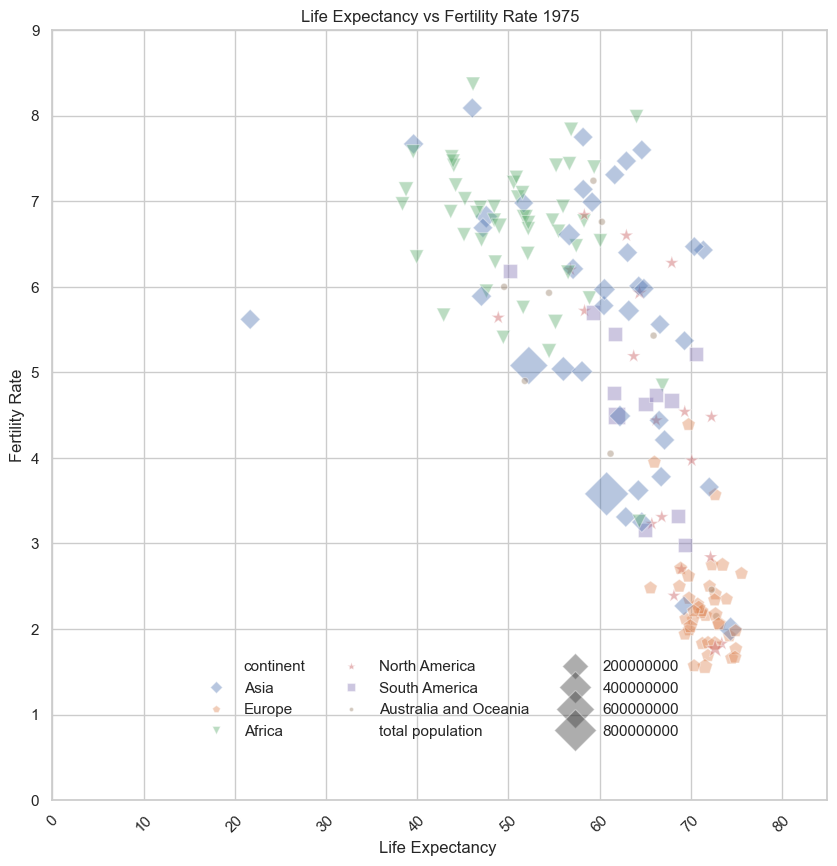

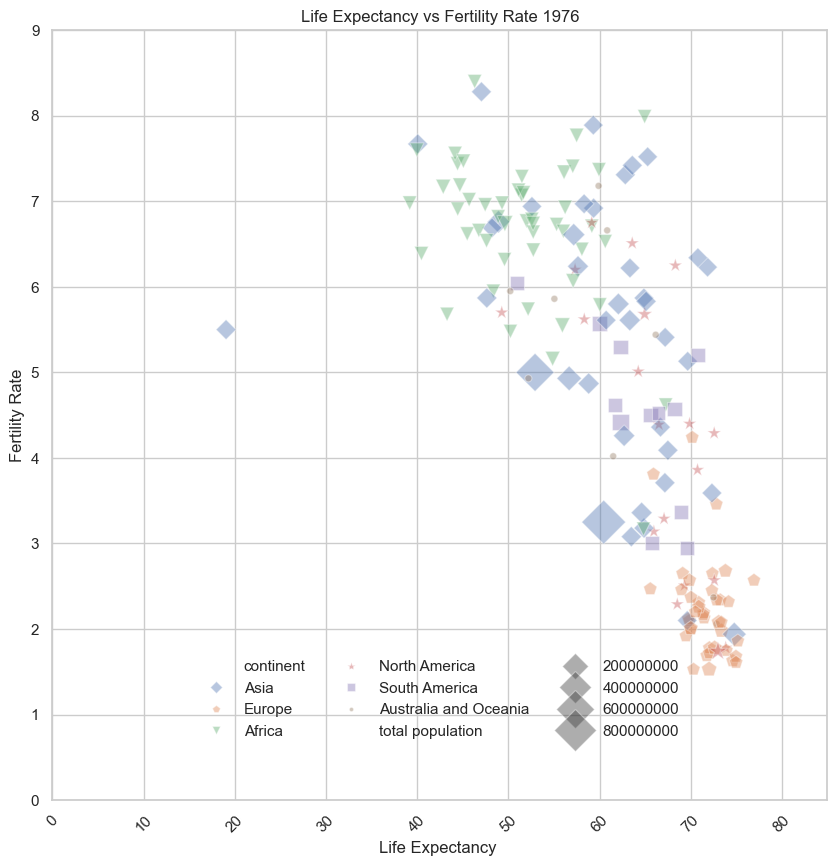

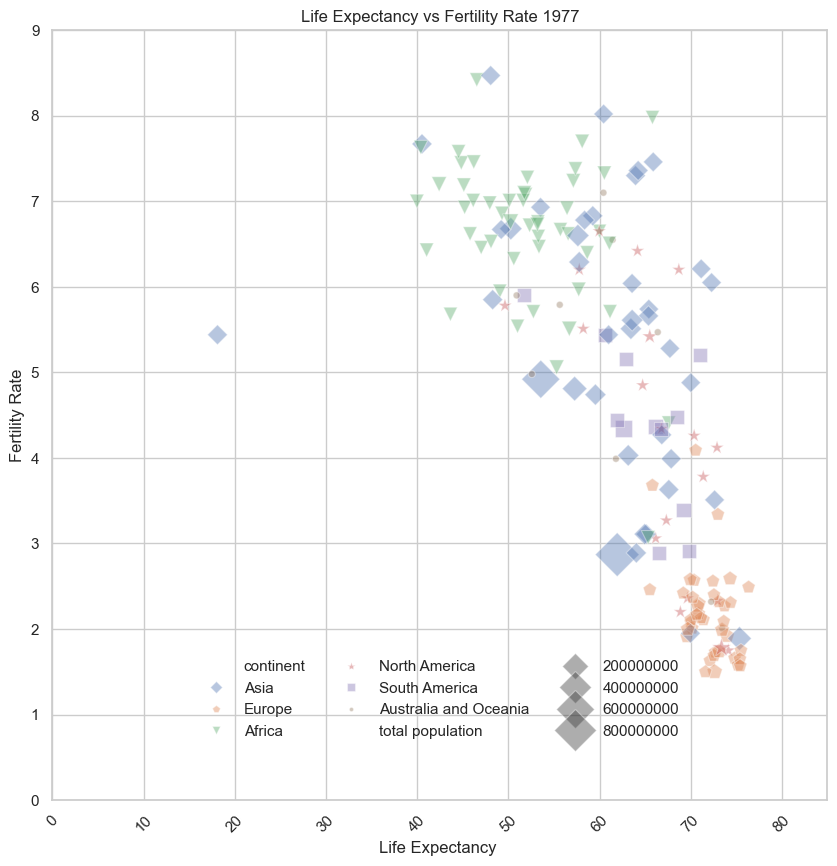

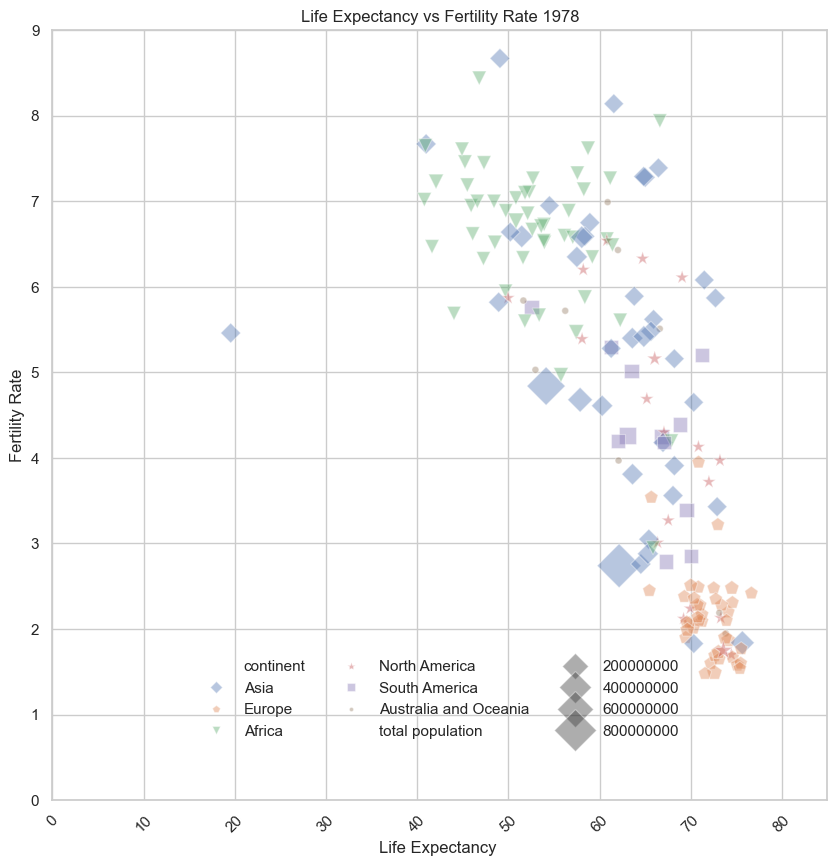

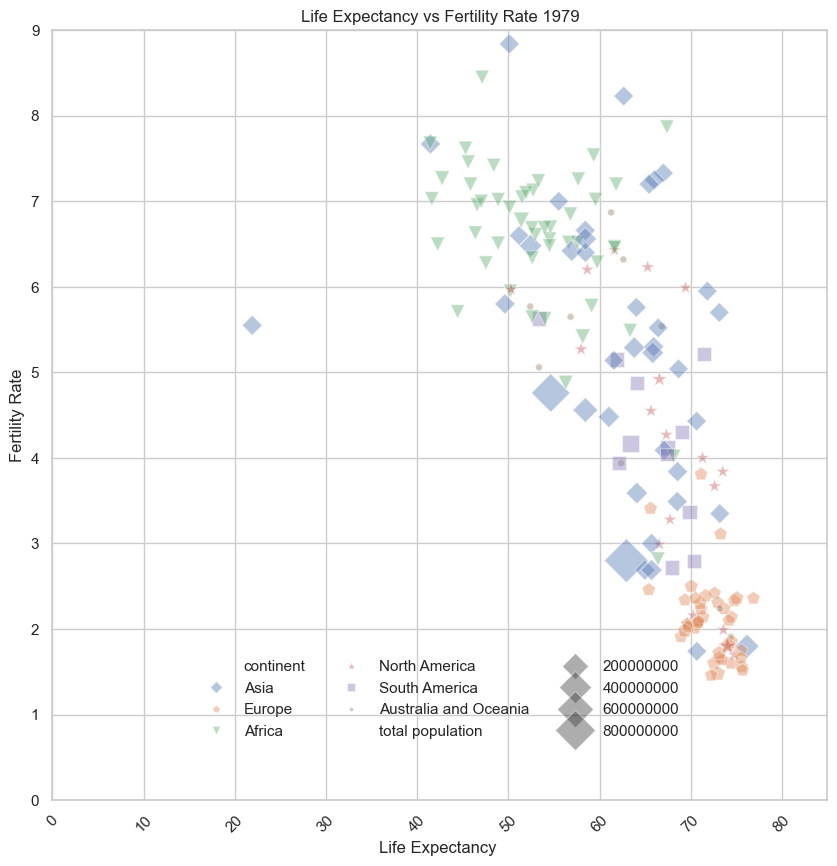

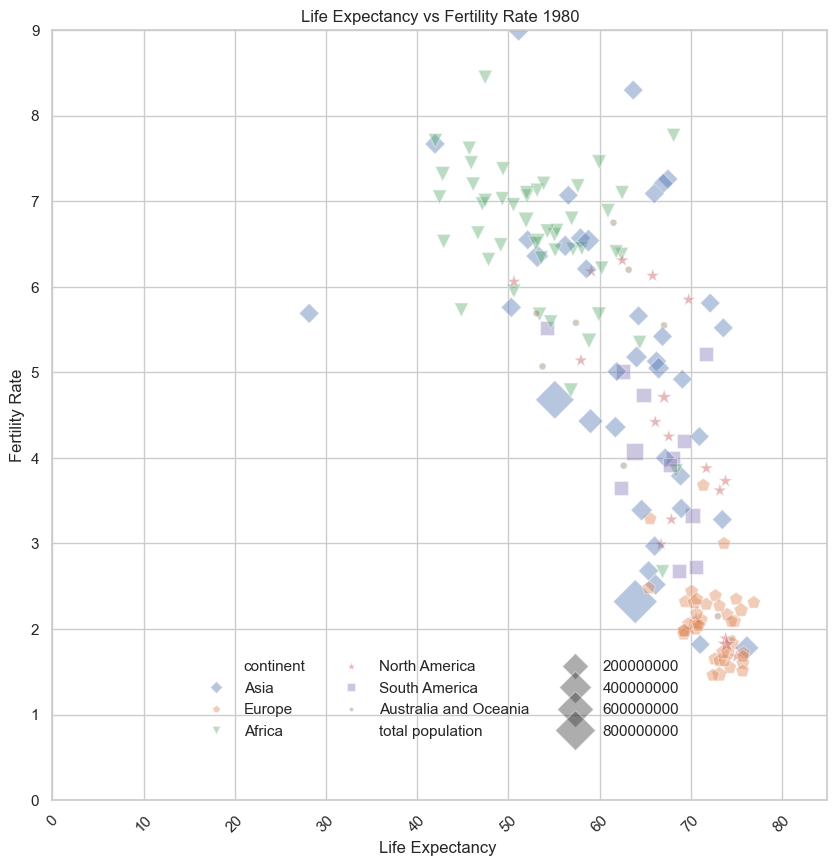

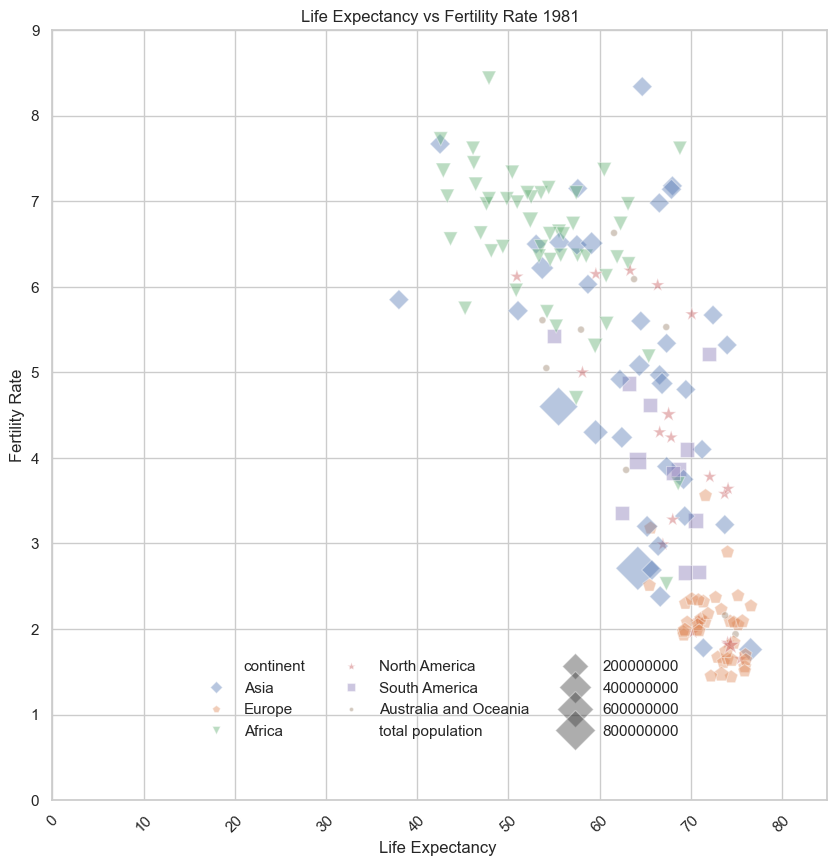

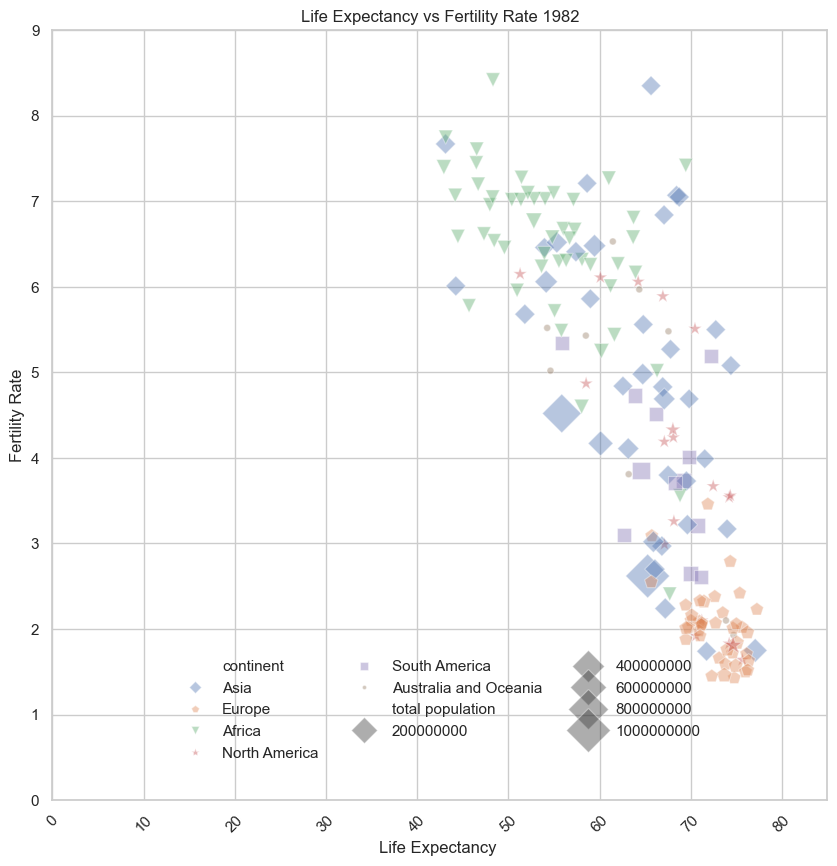

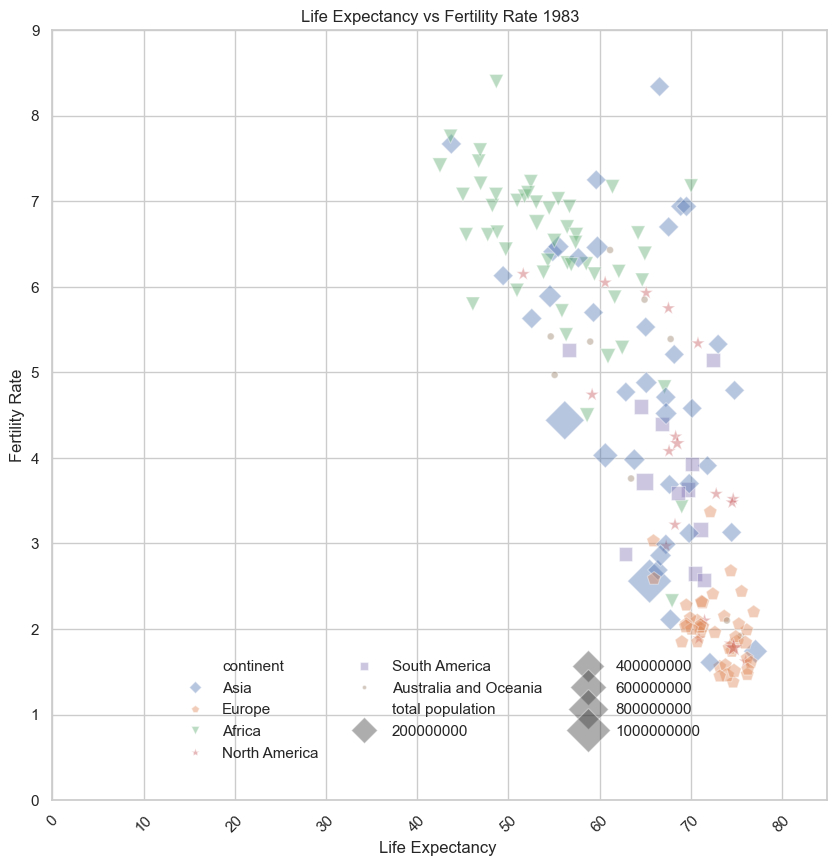

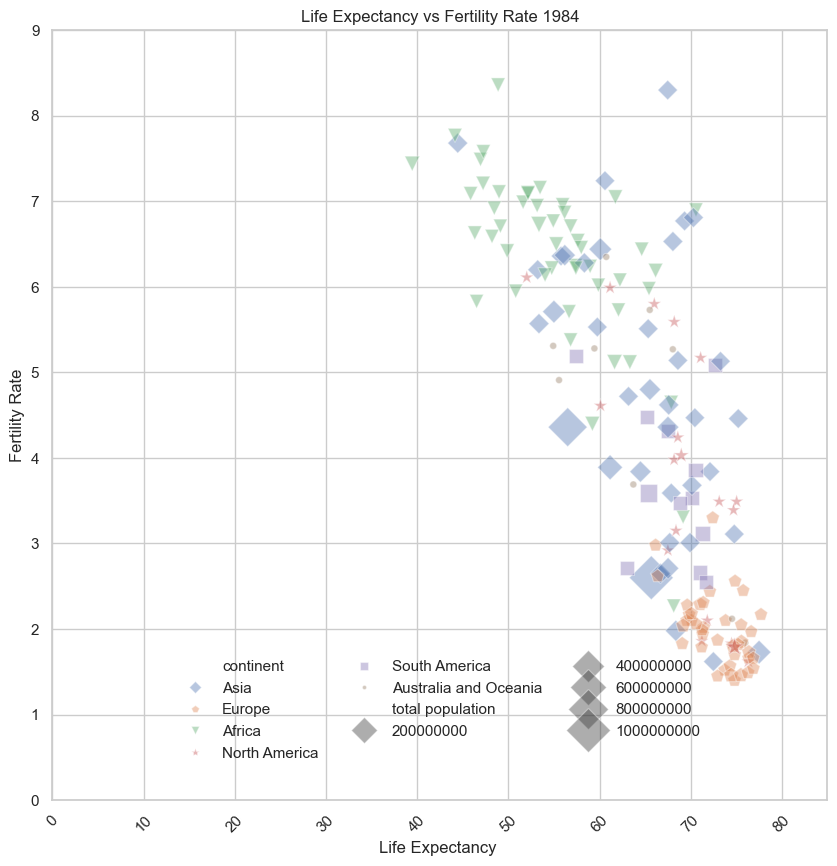

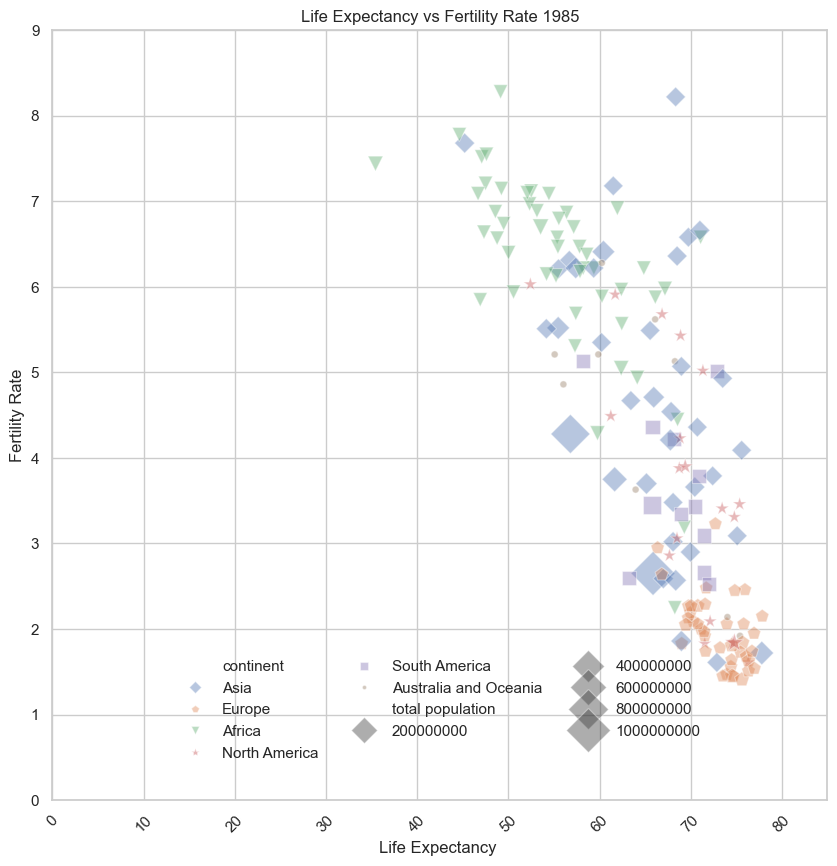

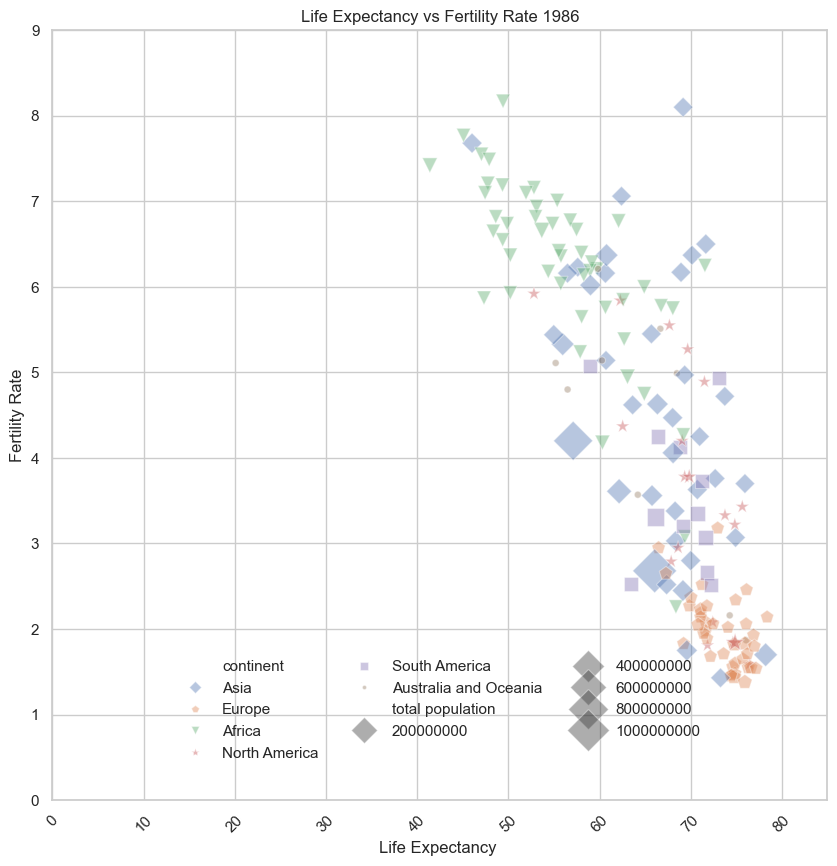

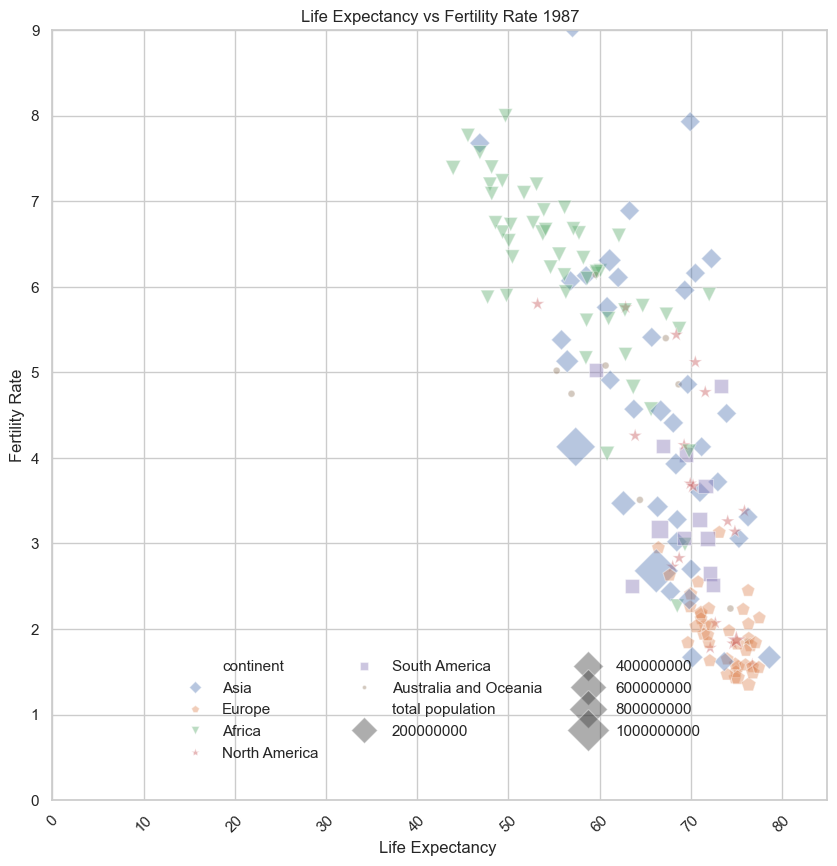

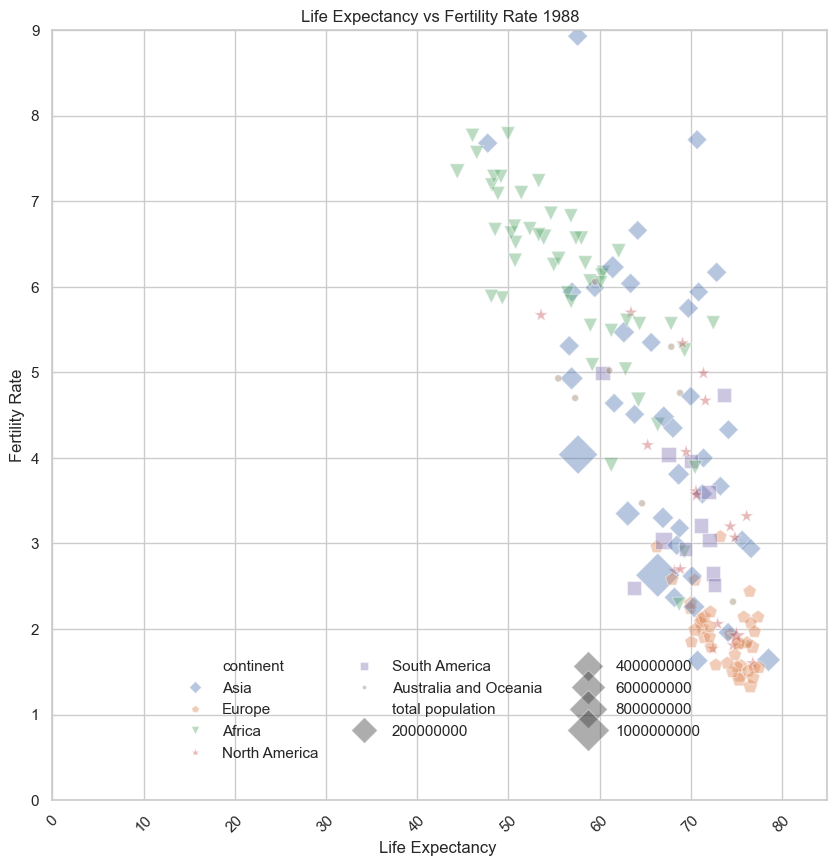

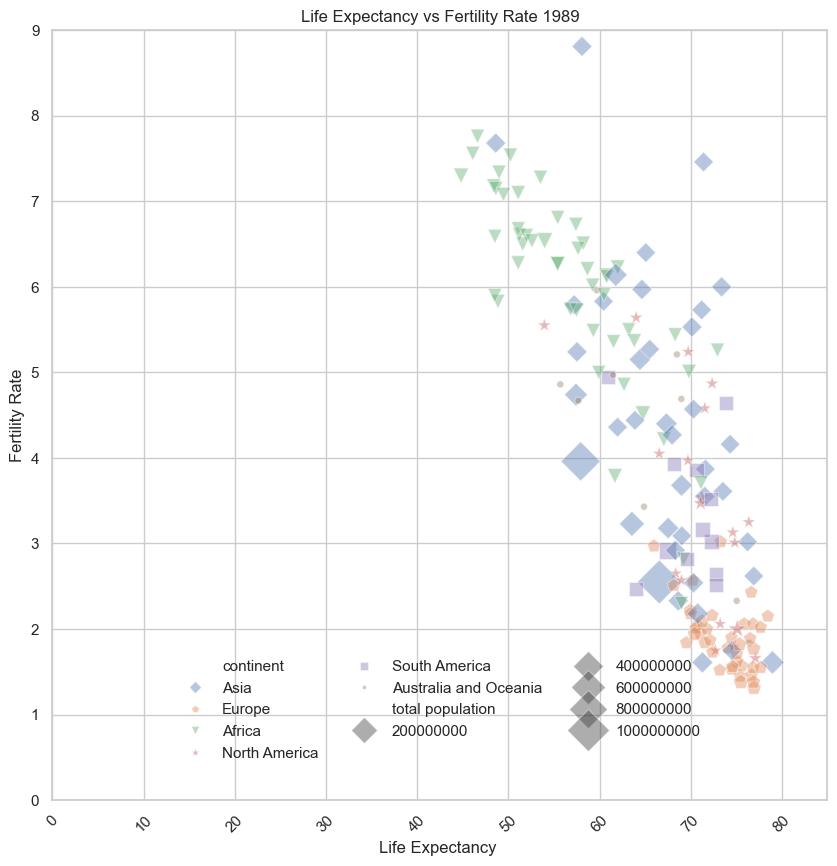

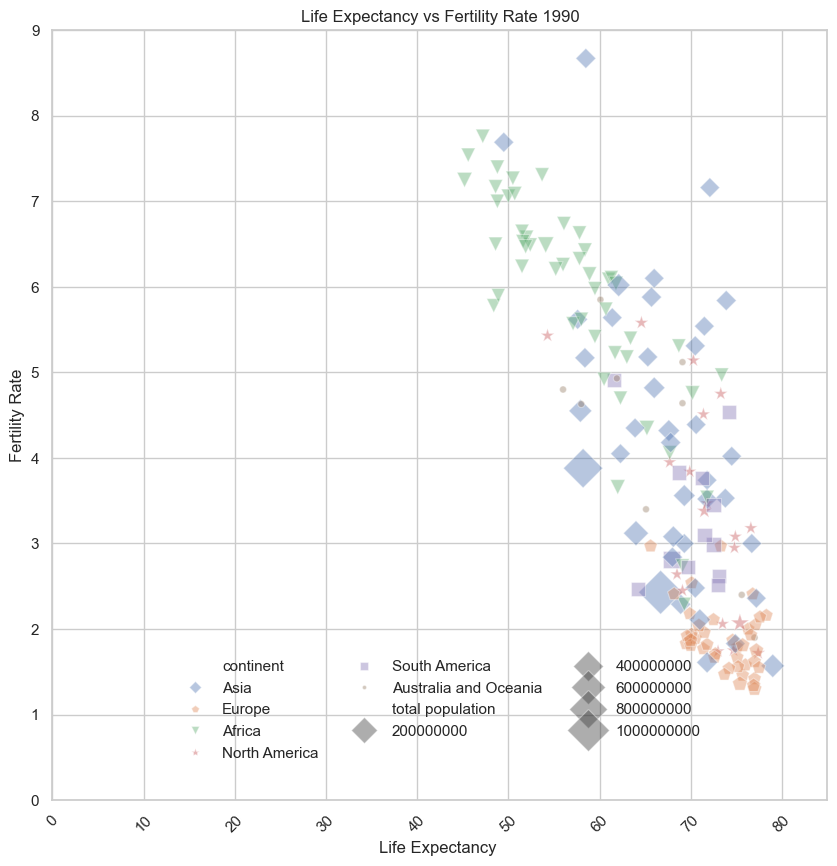

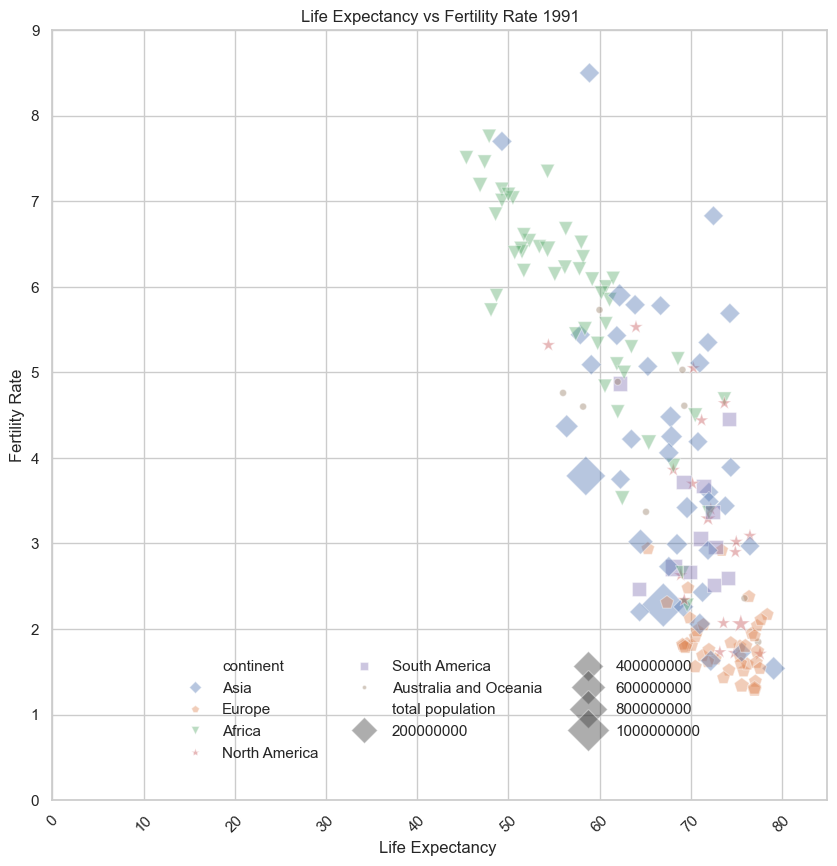

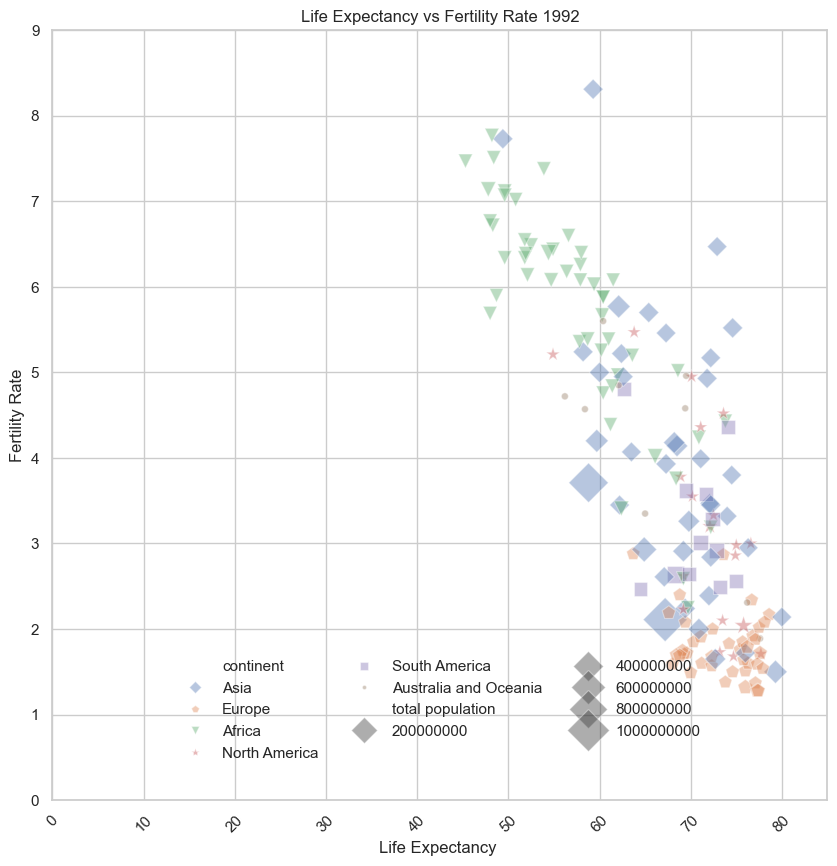

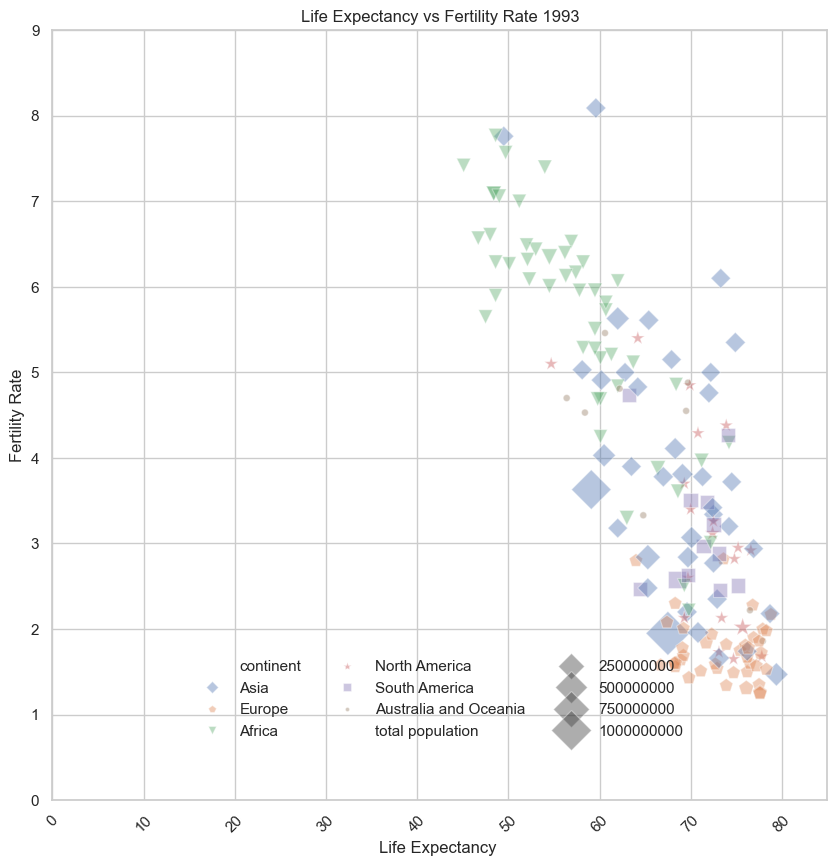

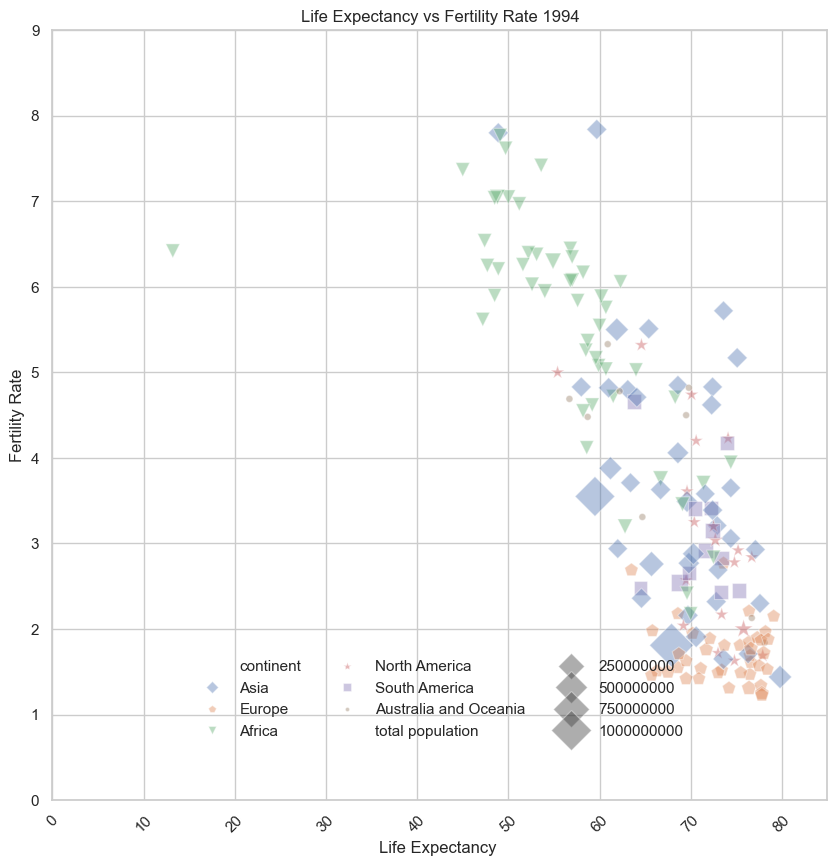

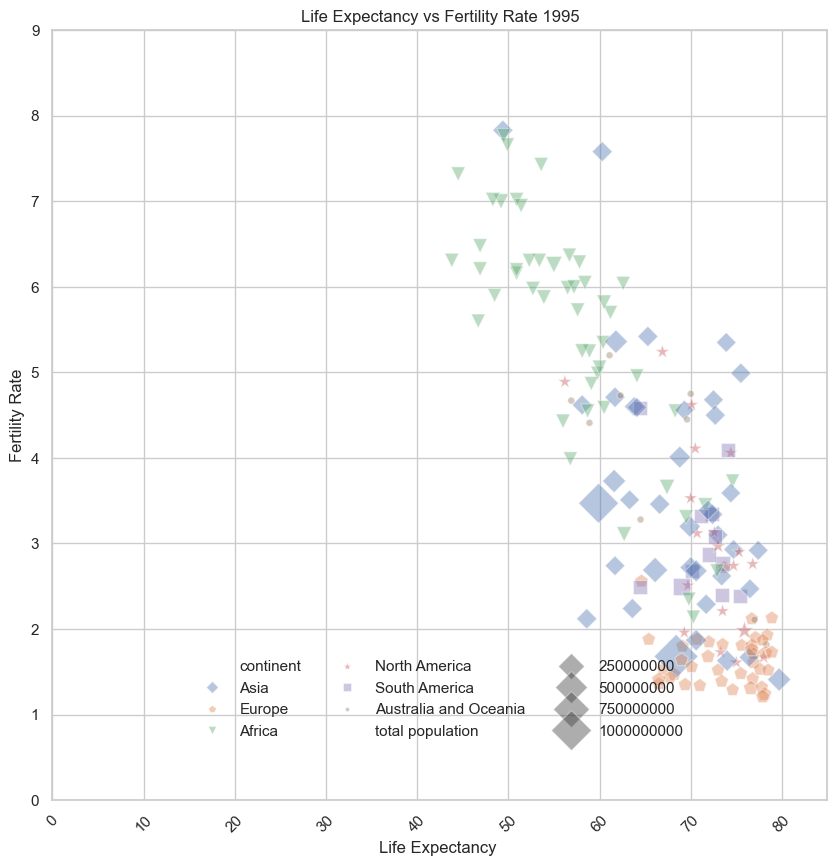

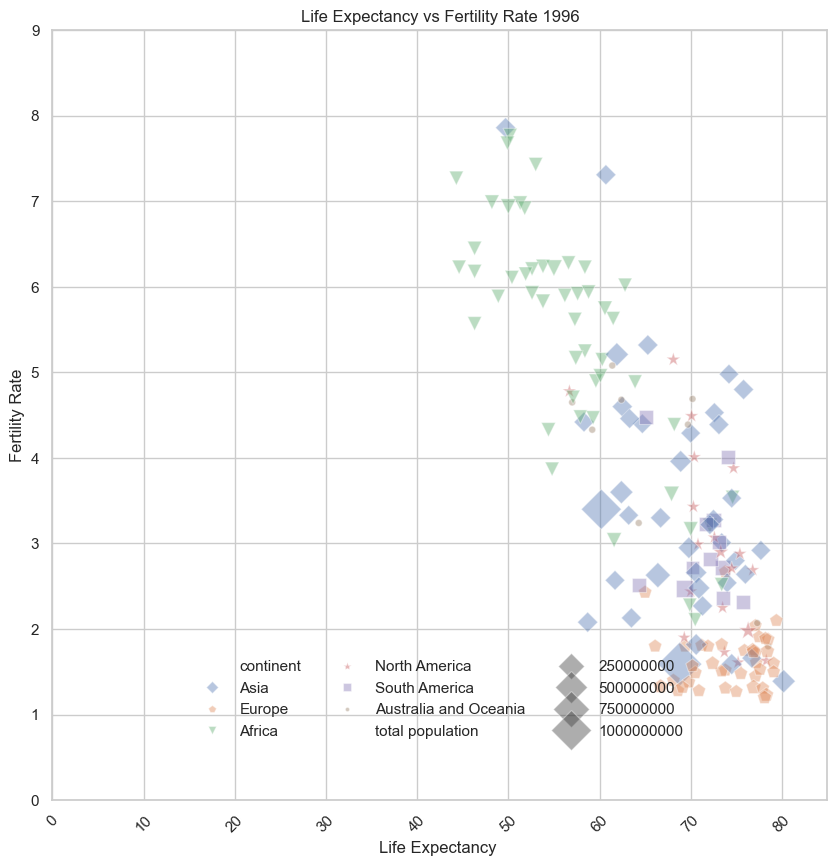

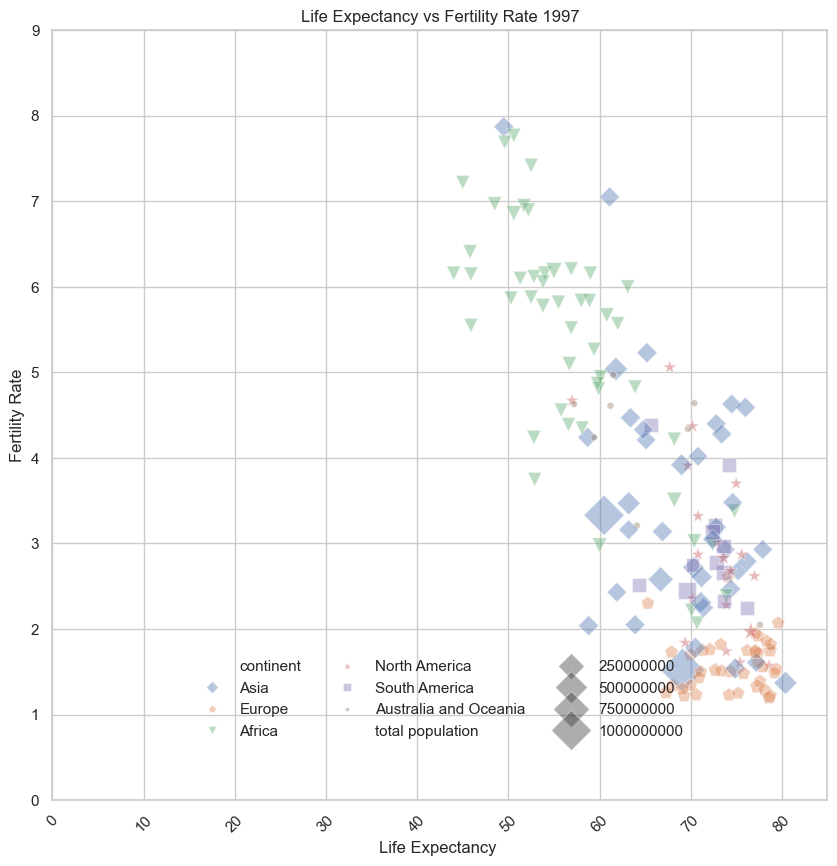

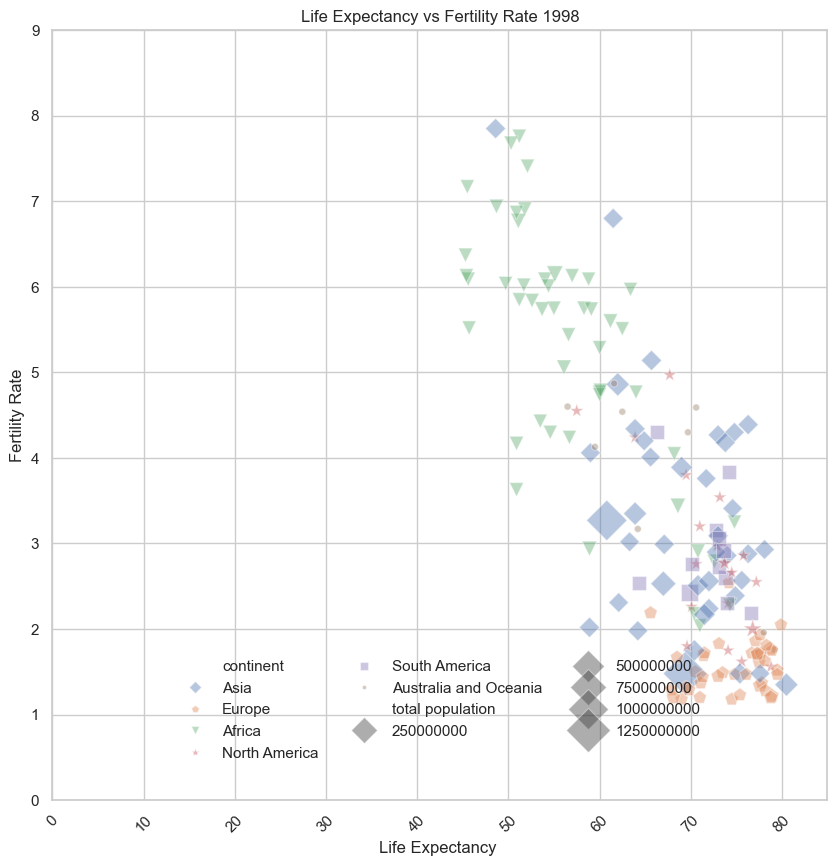

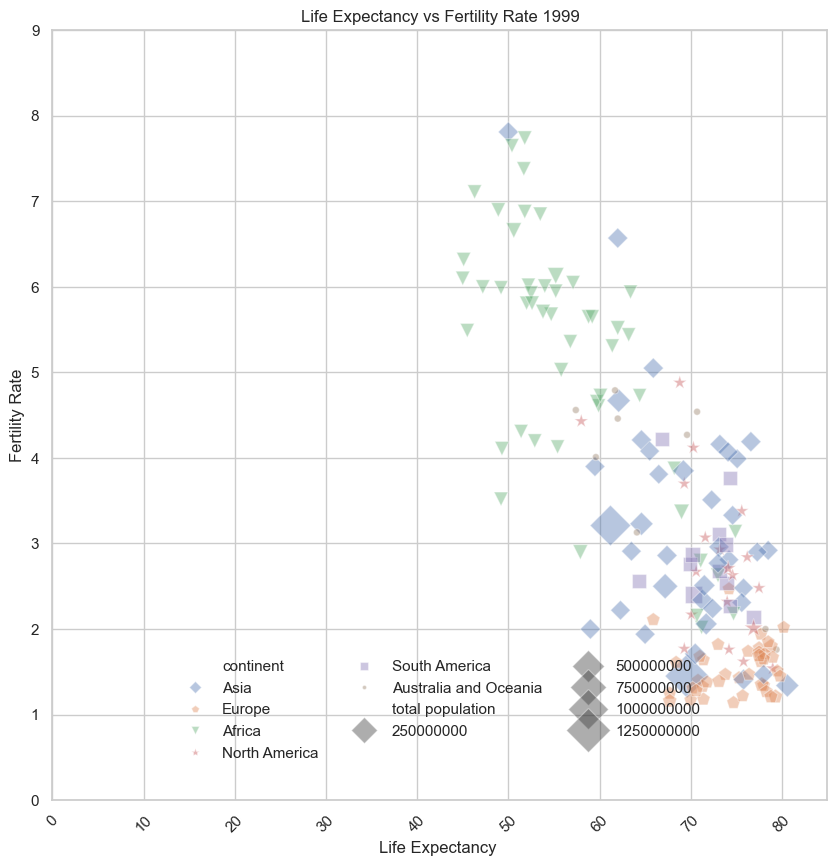

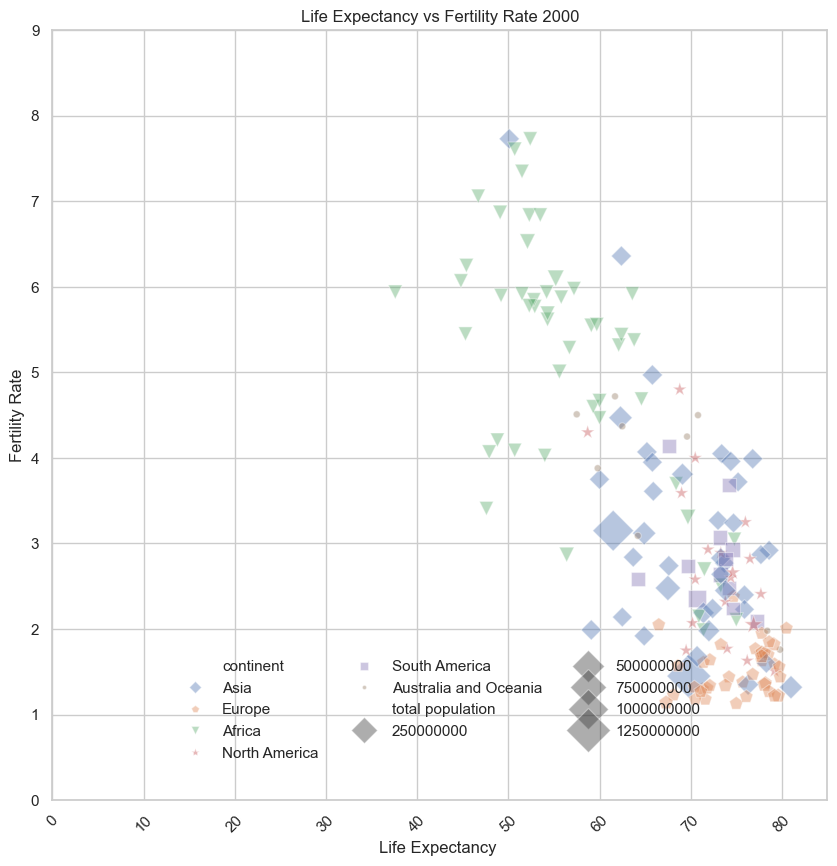

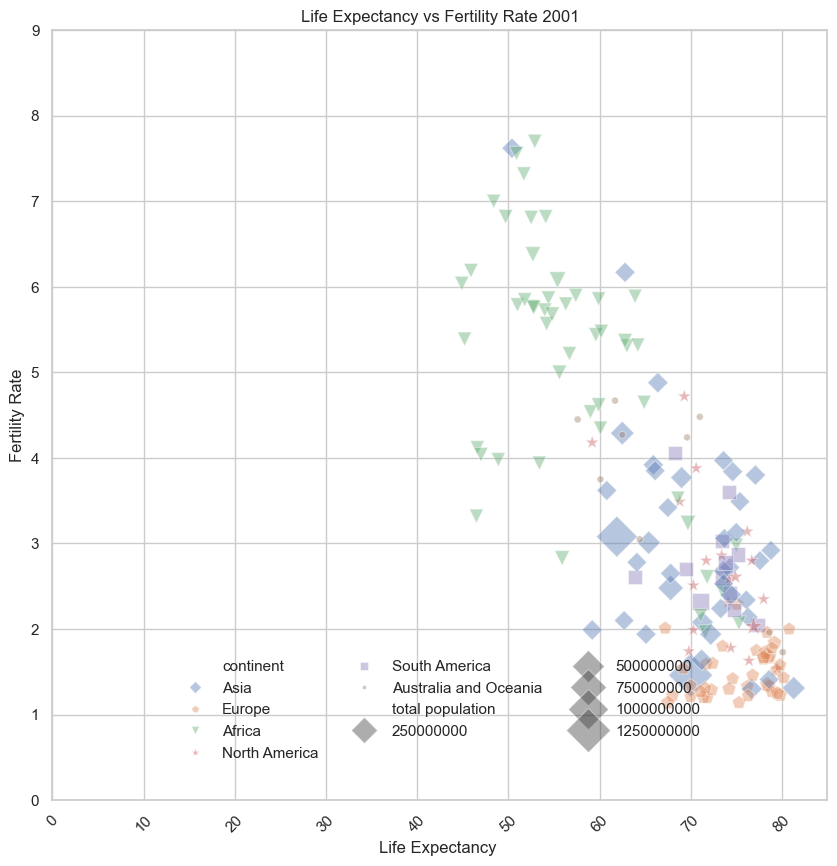

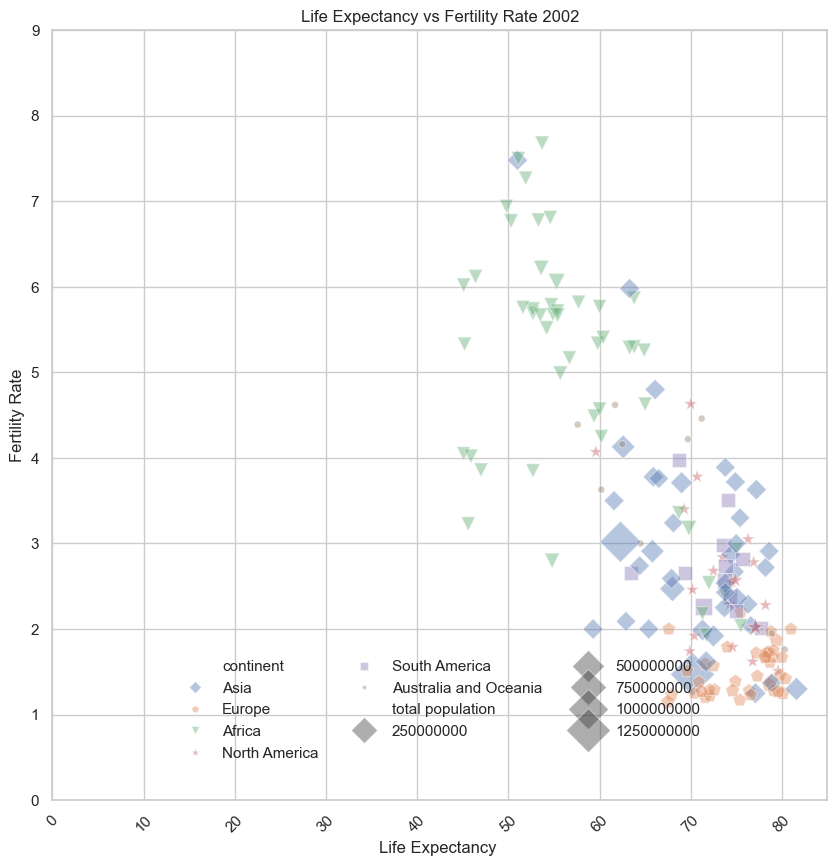

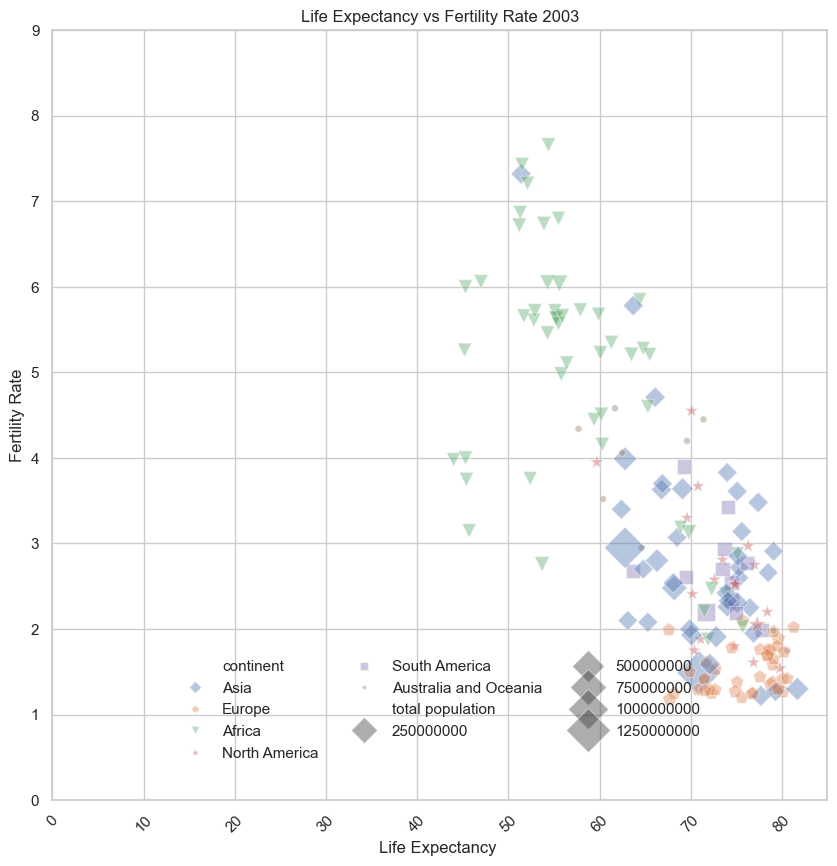

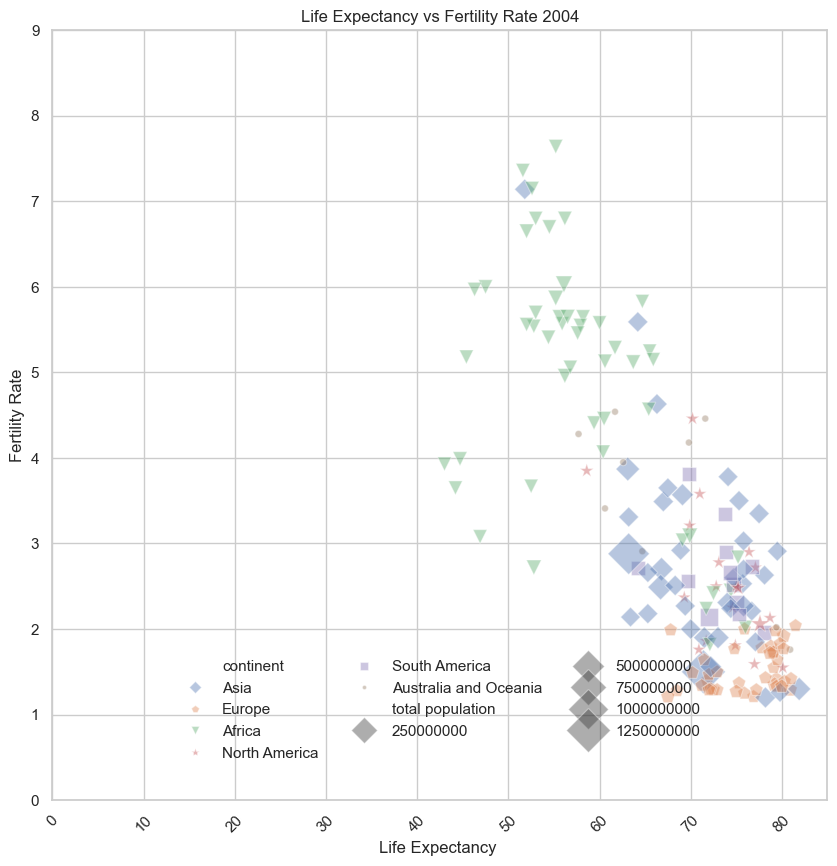

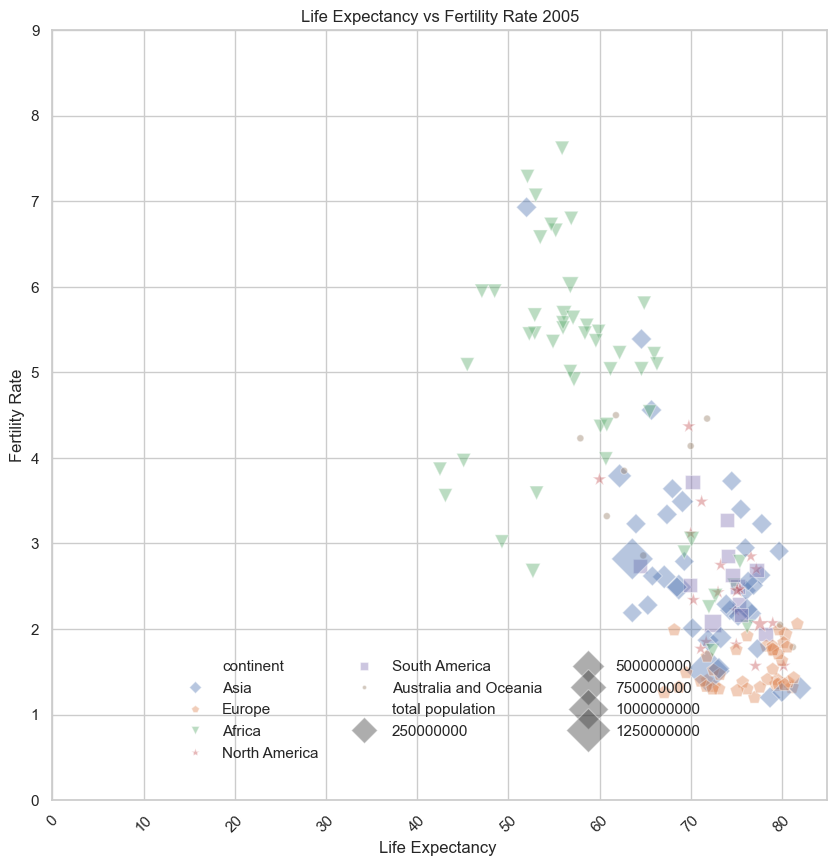

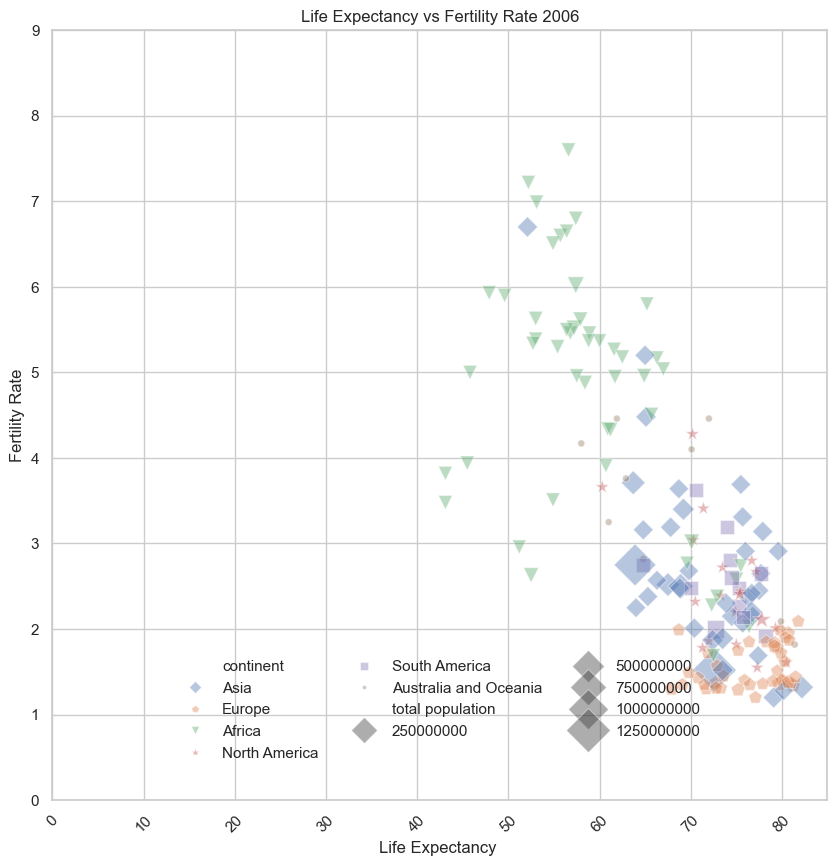

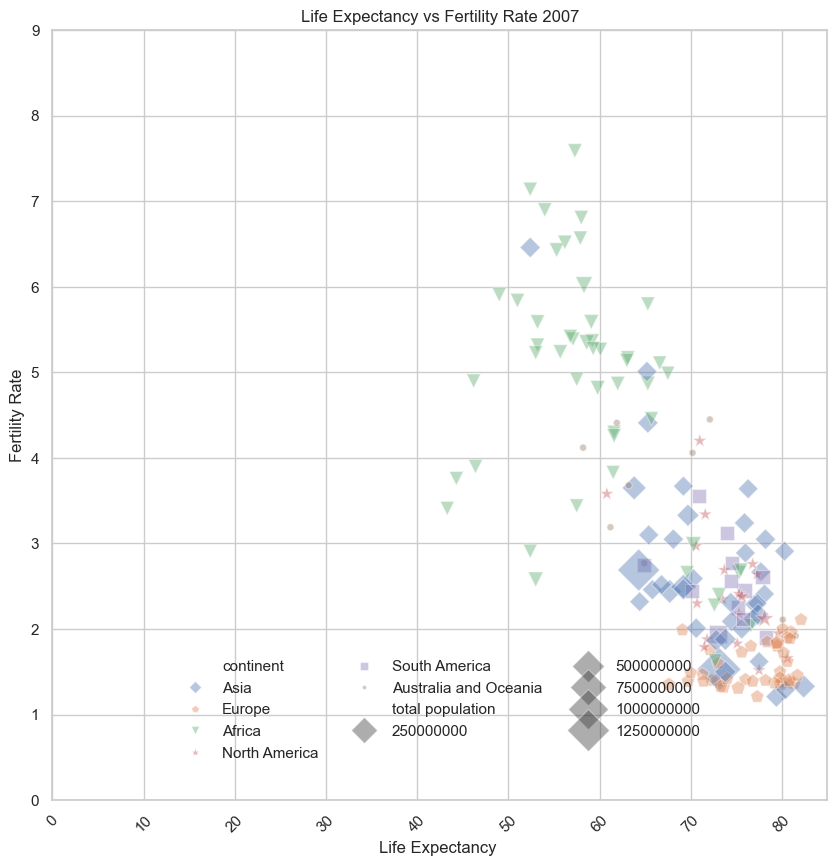

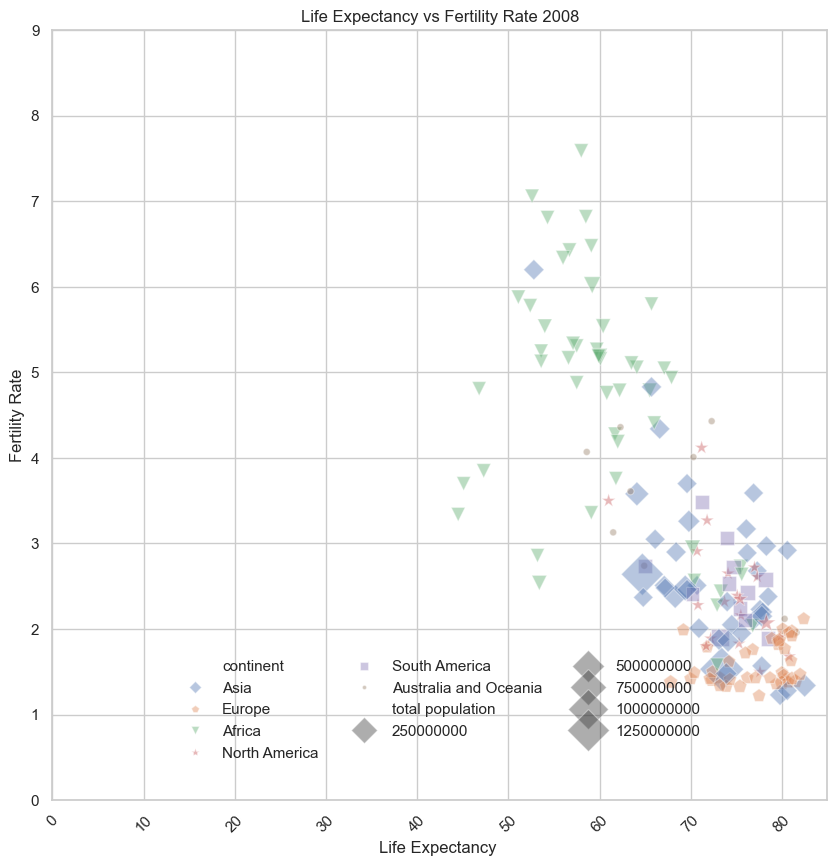

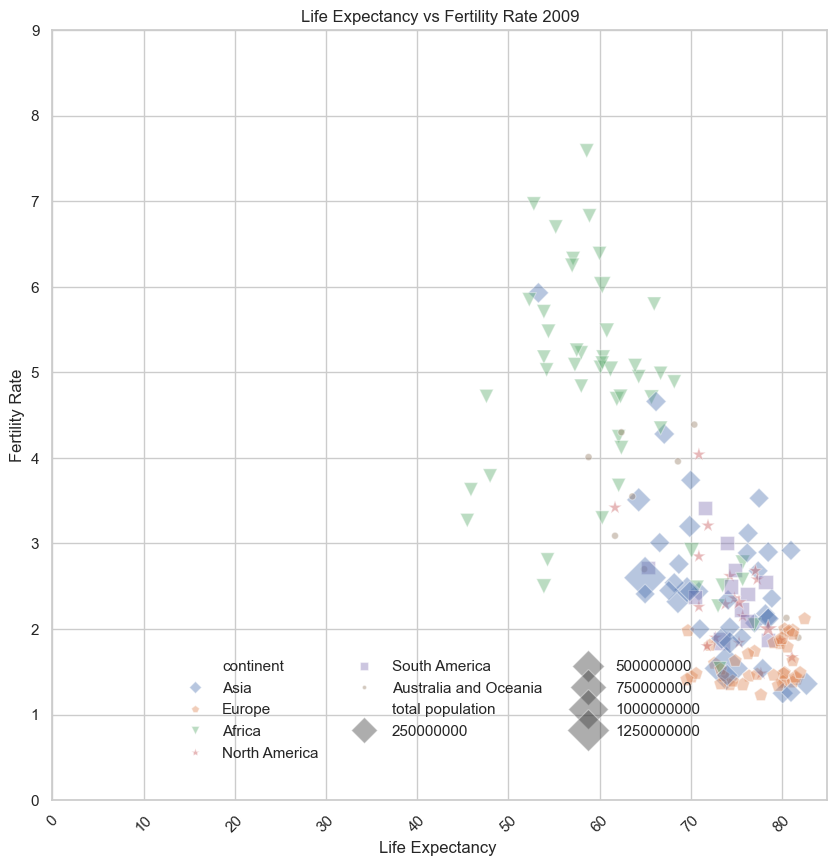

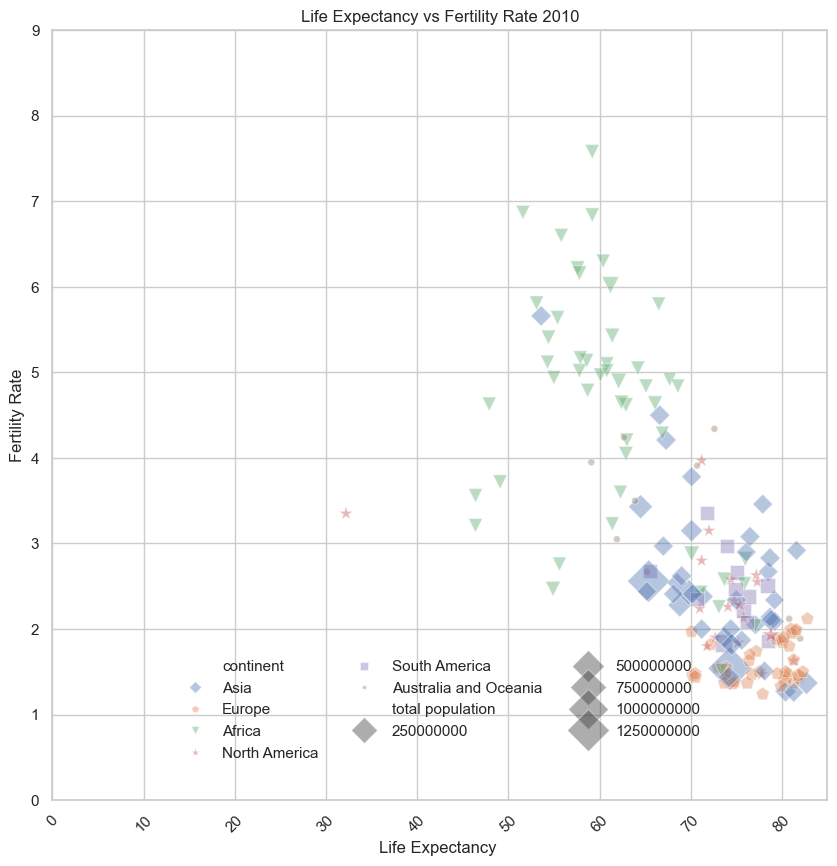

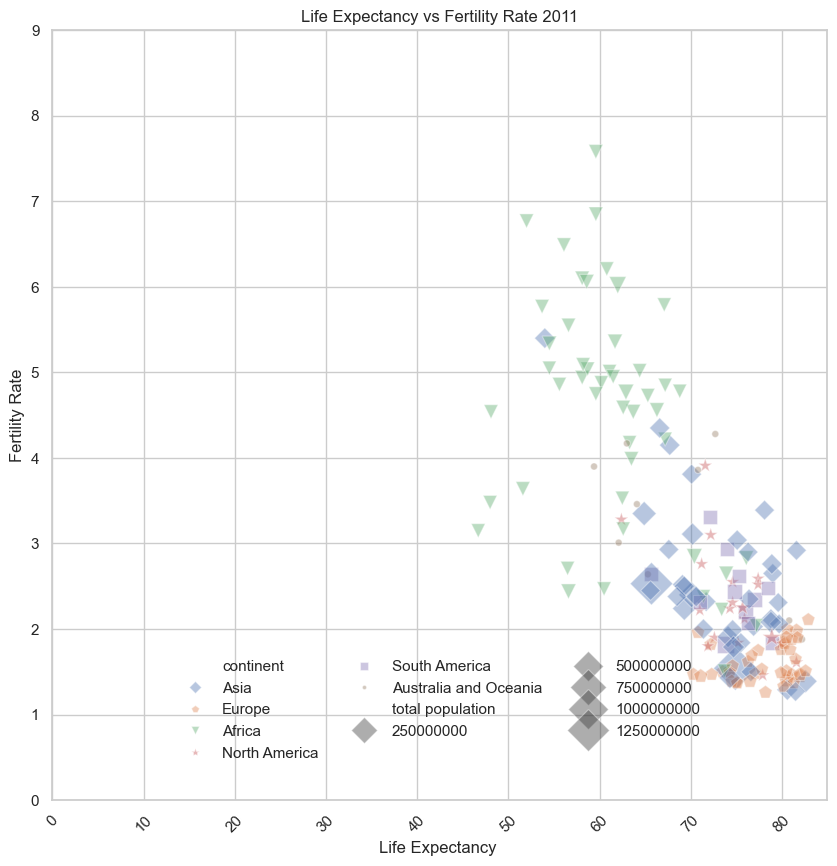

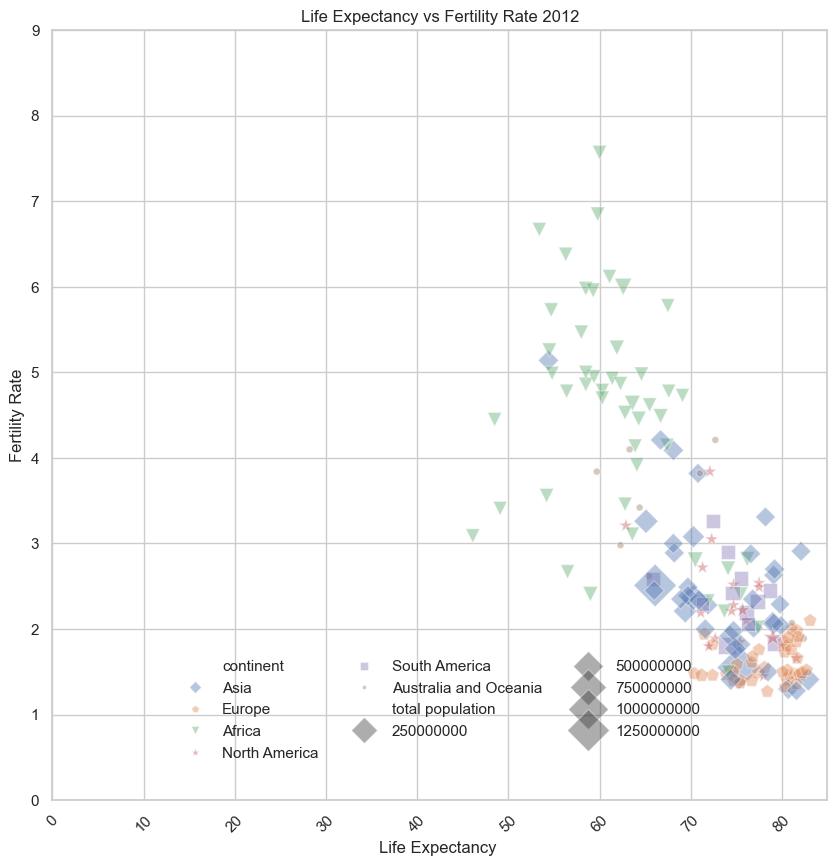

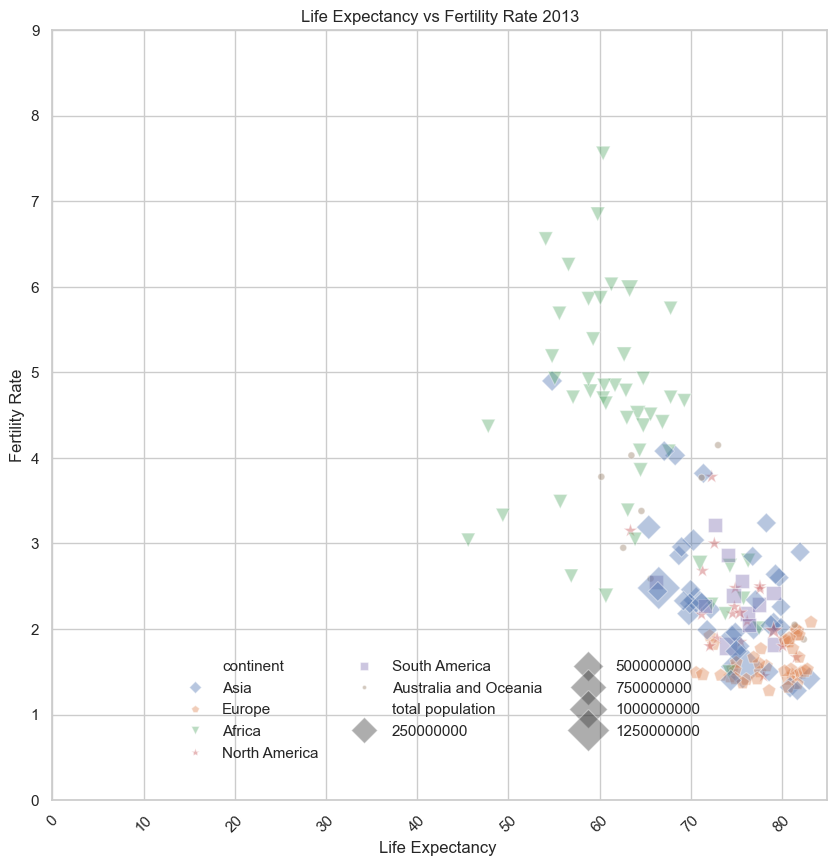

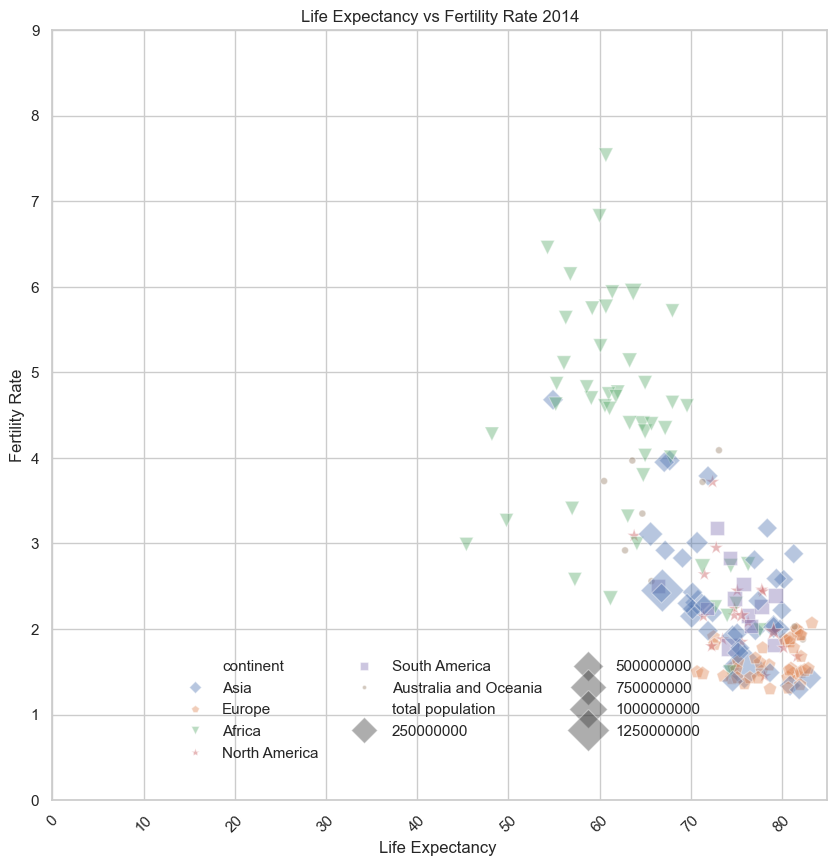

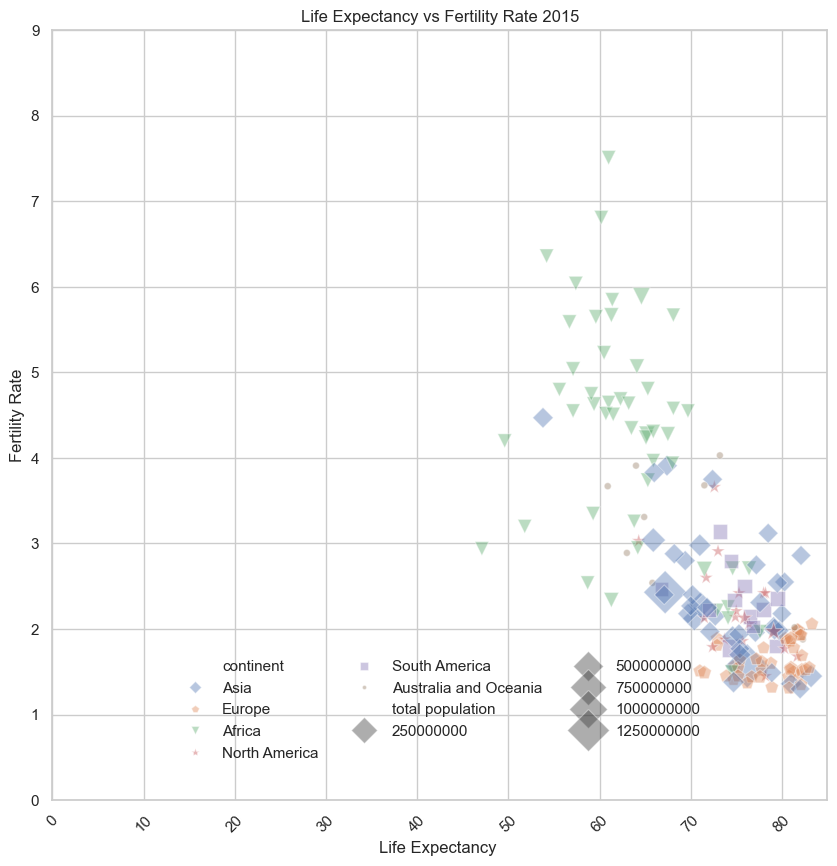

In [119]:
for year in range(1950, 2016):
    df_subset = df[df['year'] == year]
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x='life expectancy', y='fertility_rate', size='total population',
                    sizes=(100, 500), style='continent', hue='continent',
                    data=df_subset, alpha=0.4, markers=['D', 'p', 'v', '*', 's', '.'])
    sns.set(style="whitegrid")
    plt.xlim(0,85)
    plt.ylim(0,9)
    plt.xlabel('Life Expectancy ')
    plt.ylabel('Fertility Rate')
    plt.title(f'Life Expectancy vs Fertility Rate {year}')
    plt.legend(bbox_to_anchor=(0.5,0.2), loc= 'upper center' , frameon=False, ncol=3)
    plt.xticks(rotation=45)
    
    
    plt.show()
    plt.close()
    

In [120]:
import imageio

images = []

for year in range(1950, 2016):
    filename = f'life_expectancy_vs_fertility_rate_{year}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('all_years..gif', images, fps=7)


/var/folders/kn/69gx8nmx0z3b3y98m_v_21tr0000gn/T/ipykernel_12208/1318223670.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
